# EDA 
For EDA analysis, we will use data from GCP

In [64]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


client = bigquery.Client(project='crmhetic')

In [65]:
query_account=""" select * from `crmhetic.raw_data.accounts` """
query_job = client.query(query_account)
results = query_job.result()
# to dataframe
df_account = results.to_dataframe()

query_products=""" select * from `crmhetic.raw_data.products` """
query_job = client.query(query_products)
results = query_job.result()
df_products = results.to_dataframe()
query_sales_pepline=""" select * from `crmhetic.raw_data.sales_pepline` """
query_job = client.query(query_sales_pepline)
results = query_job.result()
df_sales_pipeline = results.to_dataframe()


/Users/camille/repo/Hetic/repo_M2/eval_certifiante/etl/dbt_crm_venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


### Account
On this part 

In [66]:
#Nb sector 
df_account['sector'].value_counts()

sector
retail                17
medical               12
technolgy             12
finance                8
marketing              8
software               7
entertainment          6
telecommunications     6
services               5
employment             4
Name: count, dtype: int64

In [67]:
df_account['office_location'].value_counts()

office_location
United States    71
Japan             1
Italy             1
Belgium           1
Romania           1
Kenya             1
Philipines        1
Germany           1
Jordan            1
Poland            1
Norway            1
Korea             1
Panama            1
China             1
Brazil            1
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

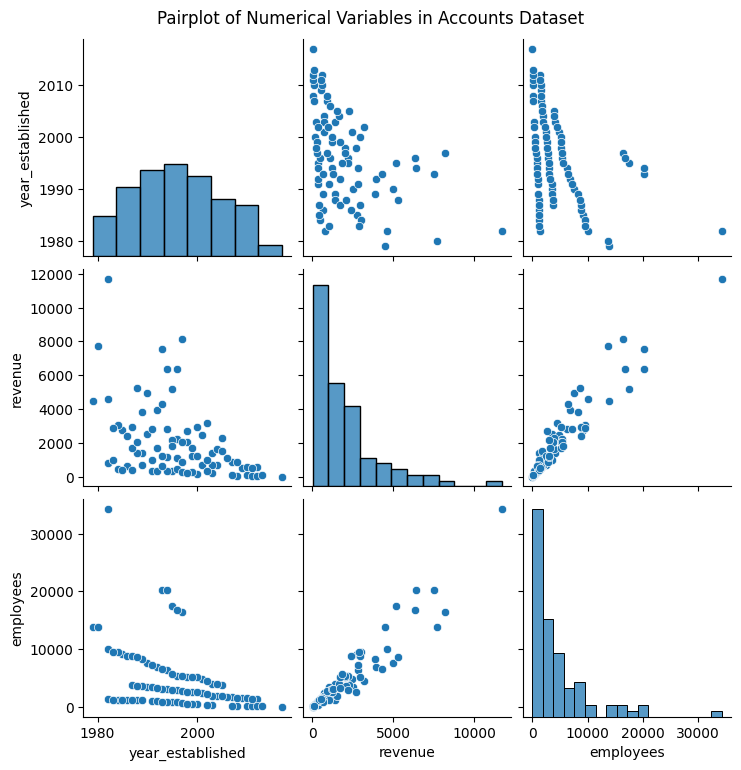

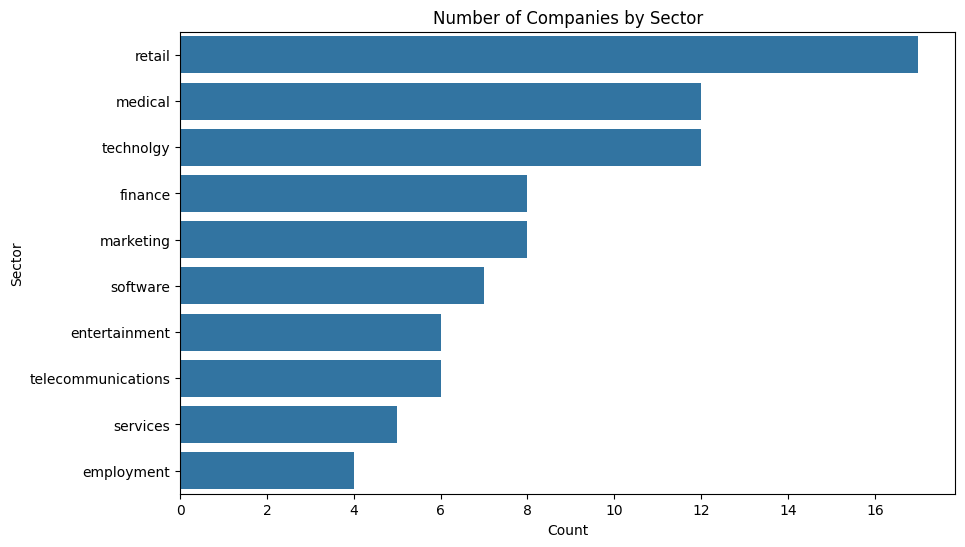

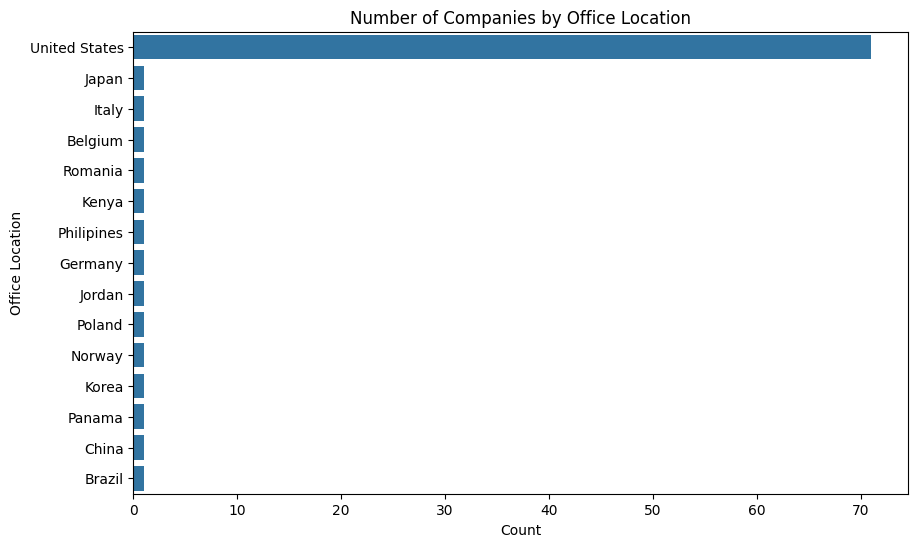

Employees Statistics:
 count           85.0
mean     4660.823529
std      5715.601198
min              9.0
25%           1179.0
50%           2769.0
75%           5595.0
max          34288.0
Name: employees, dtype: Float64 



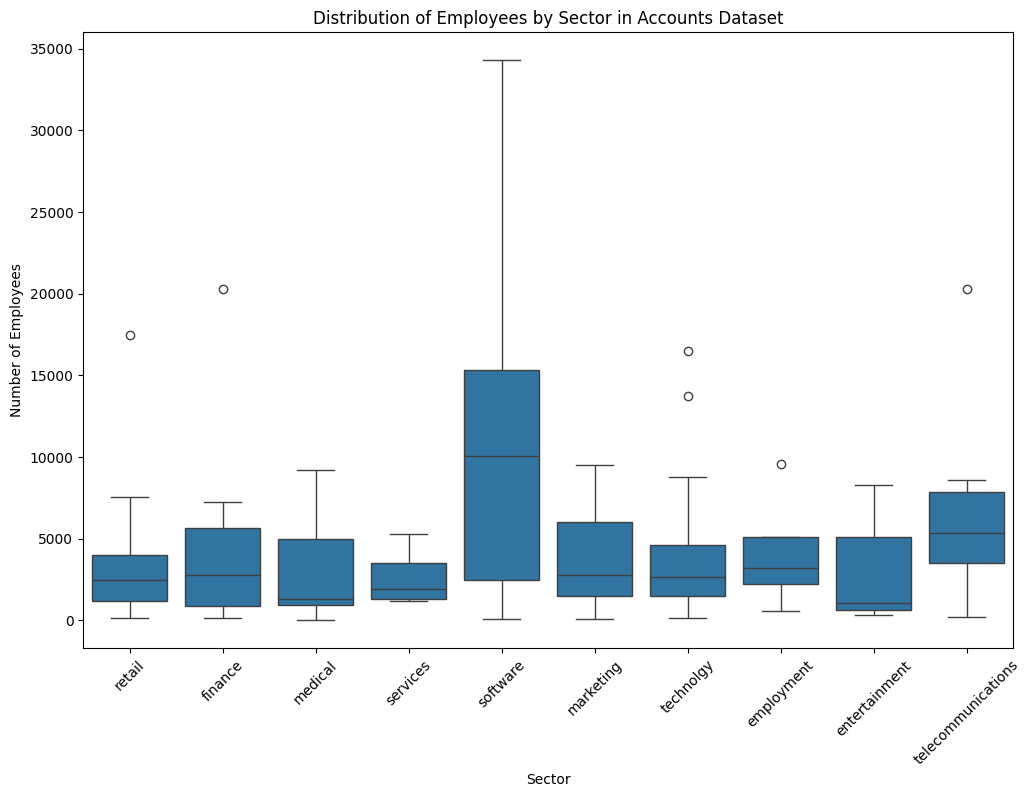

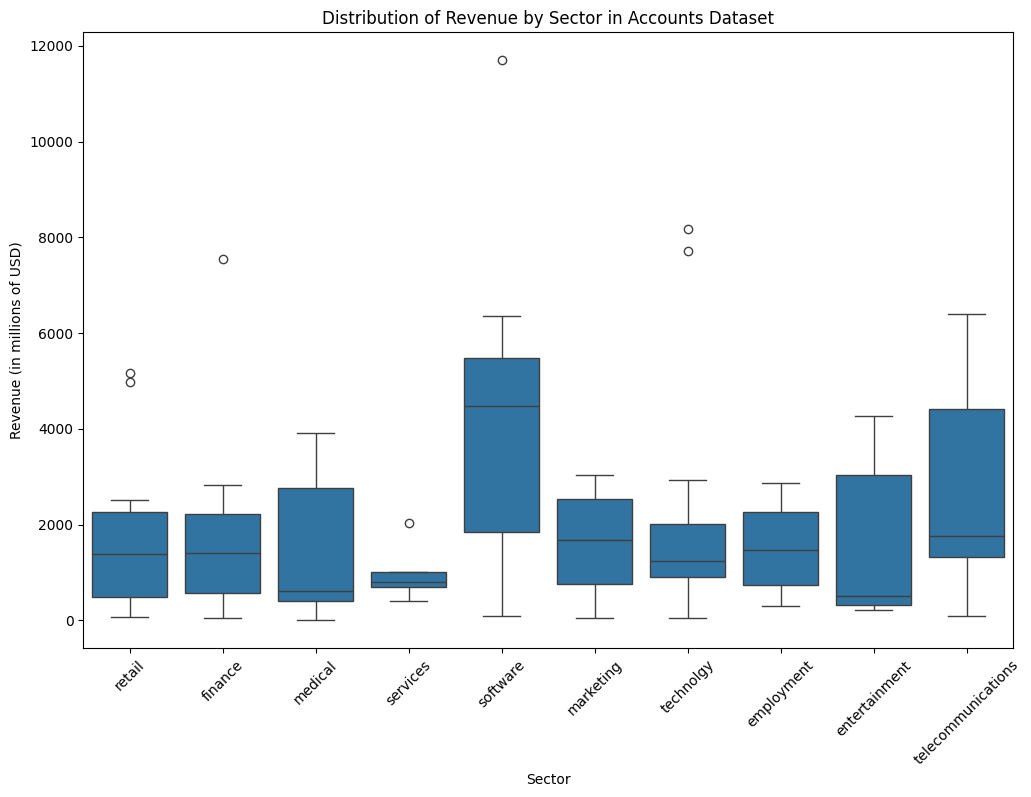

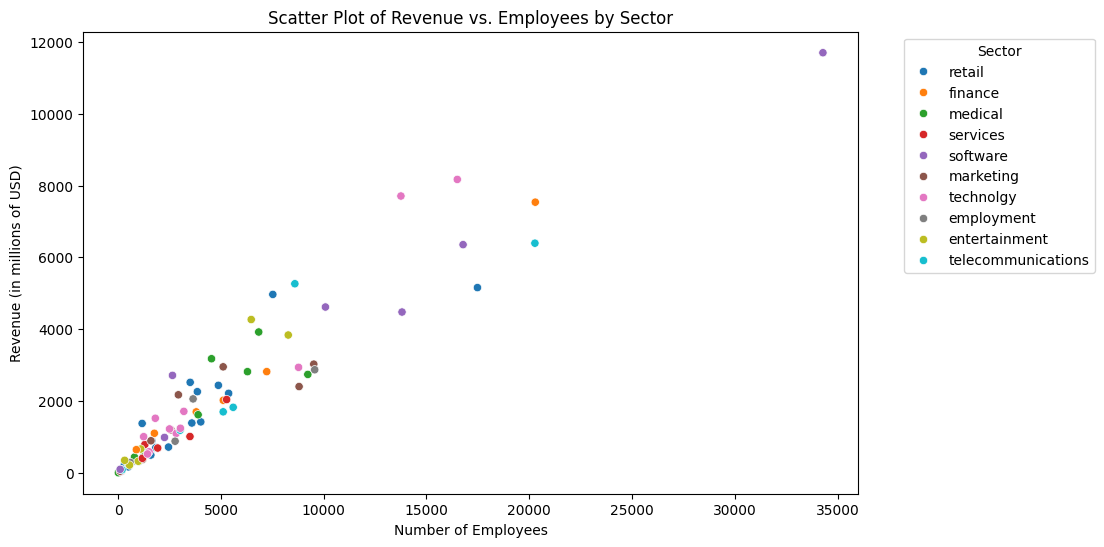

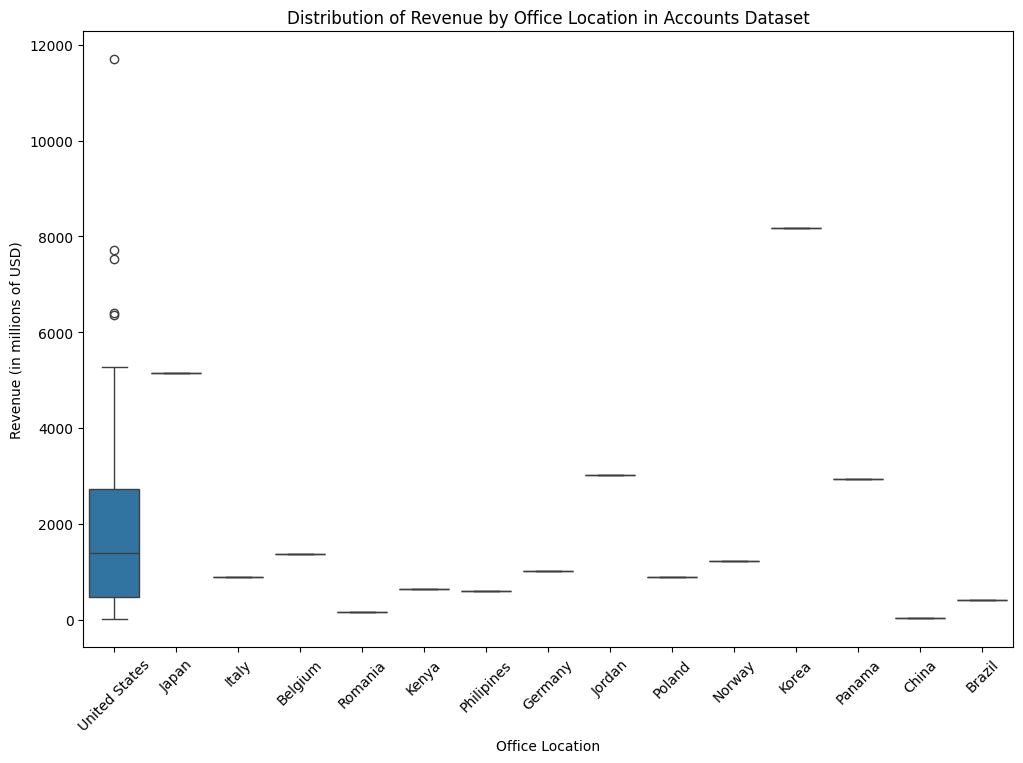

In [68]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_account)
plt.suptitle("Pairplot of Numerical Variables in Accounts Dataset", y=1.02)
plt.show()

# Count of companies per sector
plt.figure(figsize=(10, 6))
sns.countplot(y=df_account['sector'], order=df_account['sector'].value_counts().index)
plt.title("Number of Companies by Sector")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.show()

# Count of companies per office location
plt.figure(figsize=(10, 6))
sns.countplot(y=df_account['office_location'], order=df_account['office_location'].value_counts().index)
plt.title("Number of Companies by Office Location")
plt.xlabel("Count")
plt.ylabel("Office Location")
plt.show()

# Displaying basic descriptive statistics for 'employees'
print("Employees Statistics:\n", df_account['employees'].describe(), "\n")

# Boxplot to show distribution of employees by sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='employees', data=df_account)
plt.title("Distribution of Employees by Sector in Accounts Dataset")
plt.xlabel("Sector")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

# Boxplot to show distribution of revenue by sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='revenue', data=df_account)
plt.title("Distribution of Revenue by Sector in Accounts Dataset")
plt.xlabel("Sector")
plt.ylabel("Revenue (in millions of USD)")
plt.xticks(rotation=45)
plt.show()

# New Visualization: Scatter plot for Employees vs. Revenue to explore correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='employees', y='revenue', hue='sector', data=df_account)
plt.title("Scatter Plot of Revenue vs. Employees by Sector")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue (in millions of USD)")
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# New Visualization: Revenue Distribution by Office Location (for a regional view)
plt.figure(figsize=(12, 8))
sns.boxplot(x='office_location', y='revenue', data=df_account)
plt.title("Distribution of Revenue by Office Location in Accounts Dataset")
plt.xlabel("Office Location")
plt.ylabel("Revenue (in millions of USD)")
plt.xticks(rotation=45)
plt.show()

## Sales Data

In [69]:
print("Basic Information:")
df_sales_pipeline.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   opportunity_id  8800 non-null   object
 1   sales_agent     8800 non-null   object
 2   product         8800 non-null   object
 3   account         7375 non-null   object
 4   deal_stage      8800 non-null   object
 5   engage_date     8300 non-null   dbdate
 6   close_date      6711 non-null   dbdate
 7   close_value     6711 non-null   Int64 
dtypes: Int64(1), dbdate(2), object(5)
memory usage: 558.7+ KB


In [70]:
print("Summary Statistics:")
df_sales_pipeline.describe()

Summary Statistics:


,close_value
count,6711.0
mean,1490.915512
std,2320.670773
min,0.0
25%,0.0
50%,472.0
75%,3225.0
max,30288.0


In [71]:
print("Missing Values:")
df_sales_pipeline.isnull().sum()

Missing Values:


opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

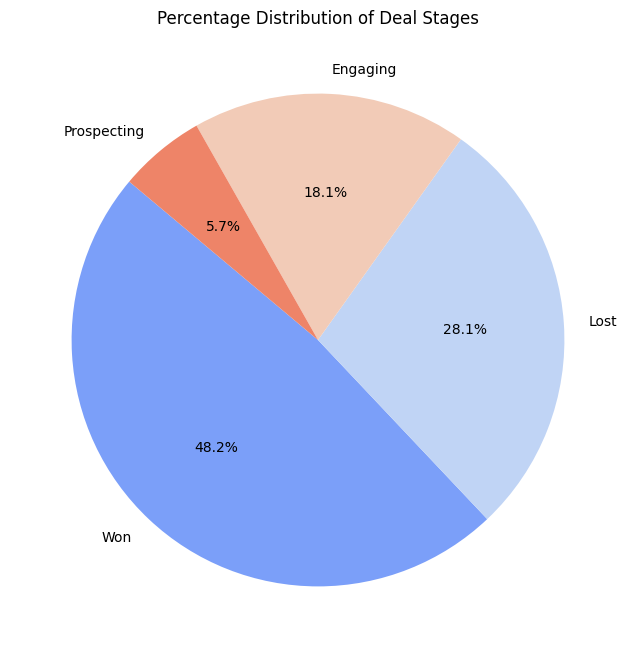

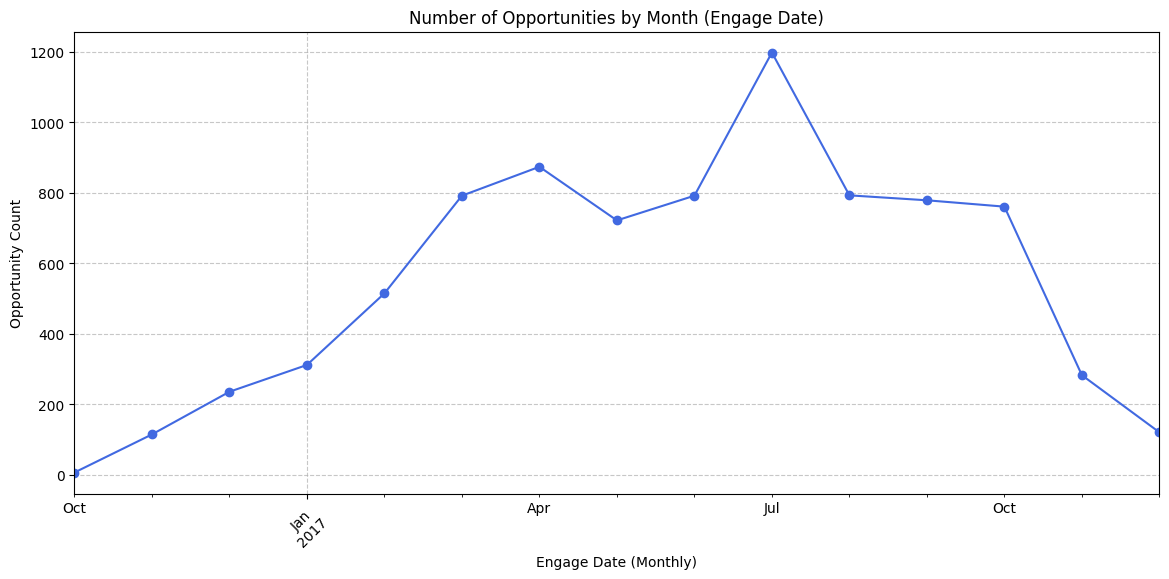

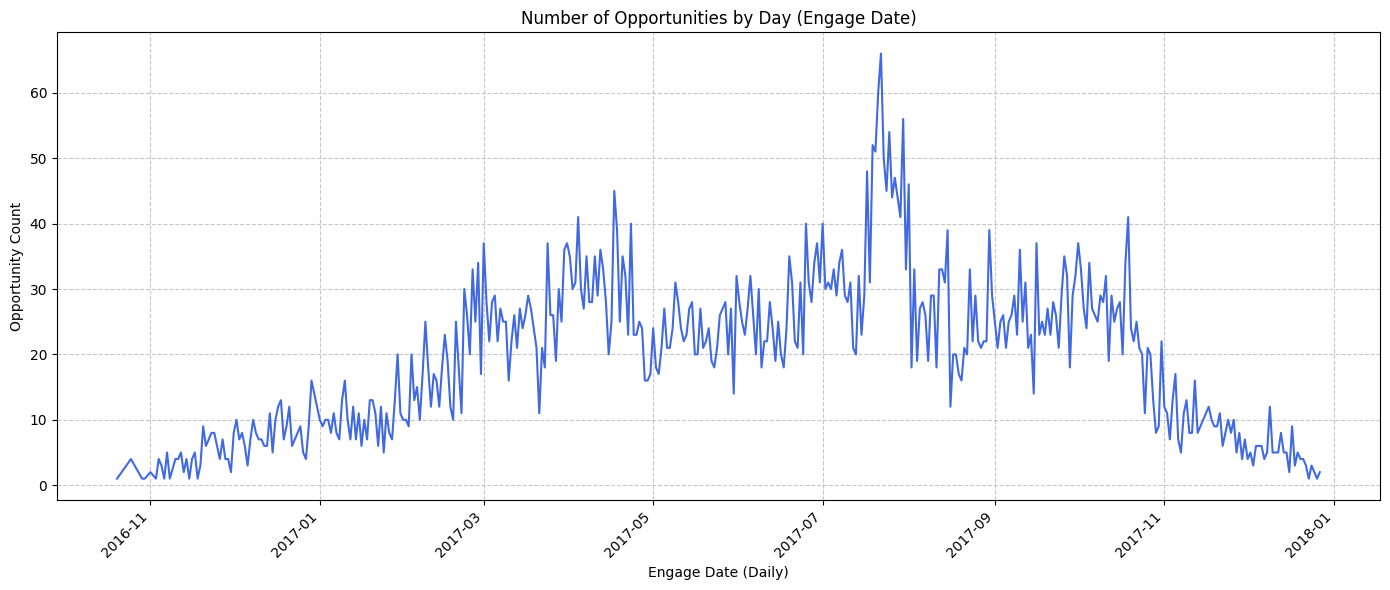

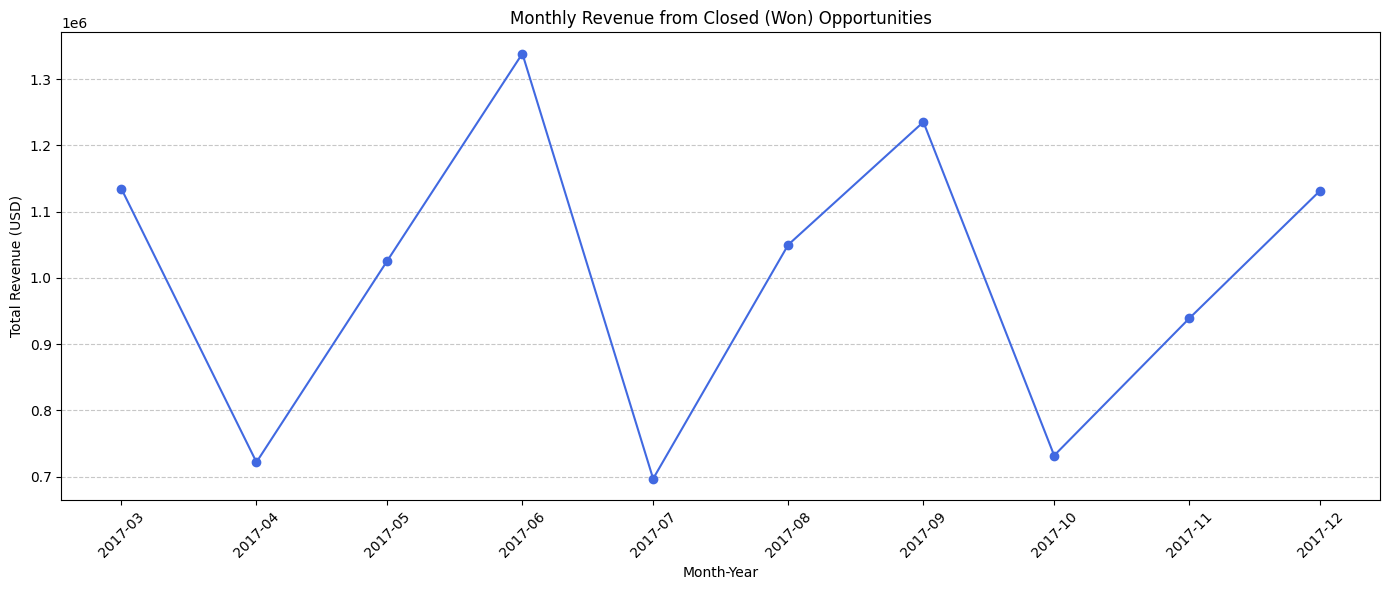

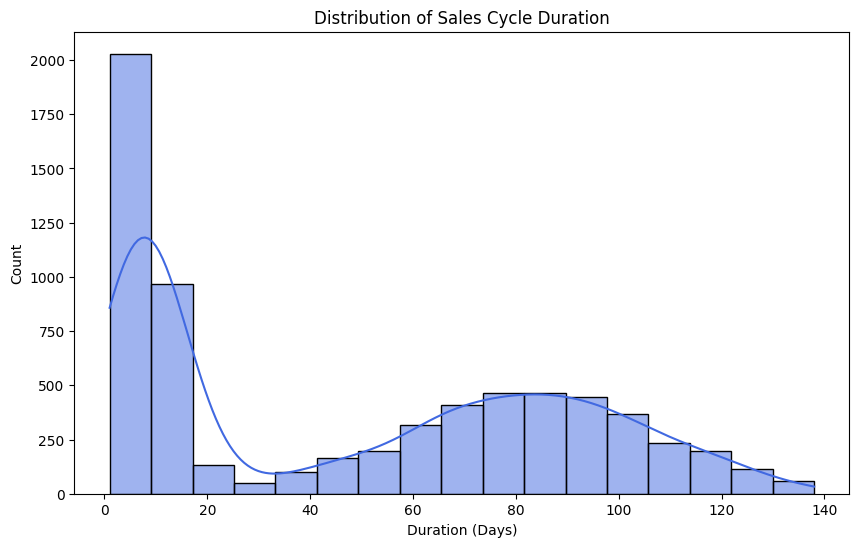

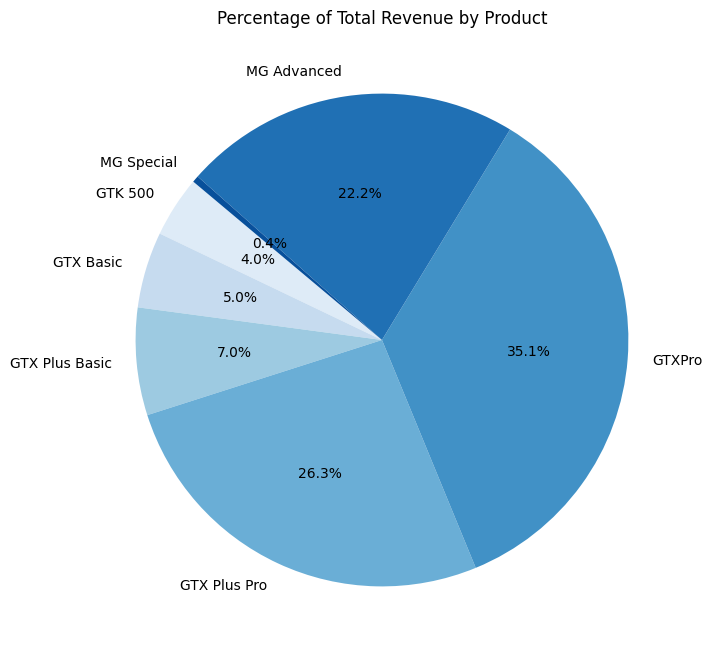

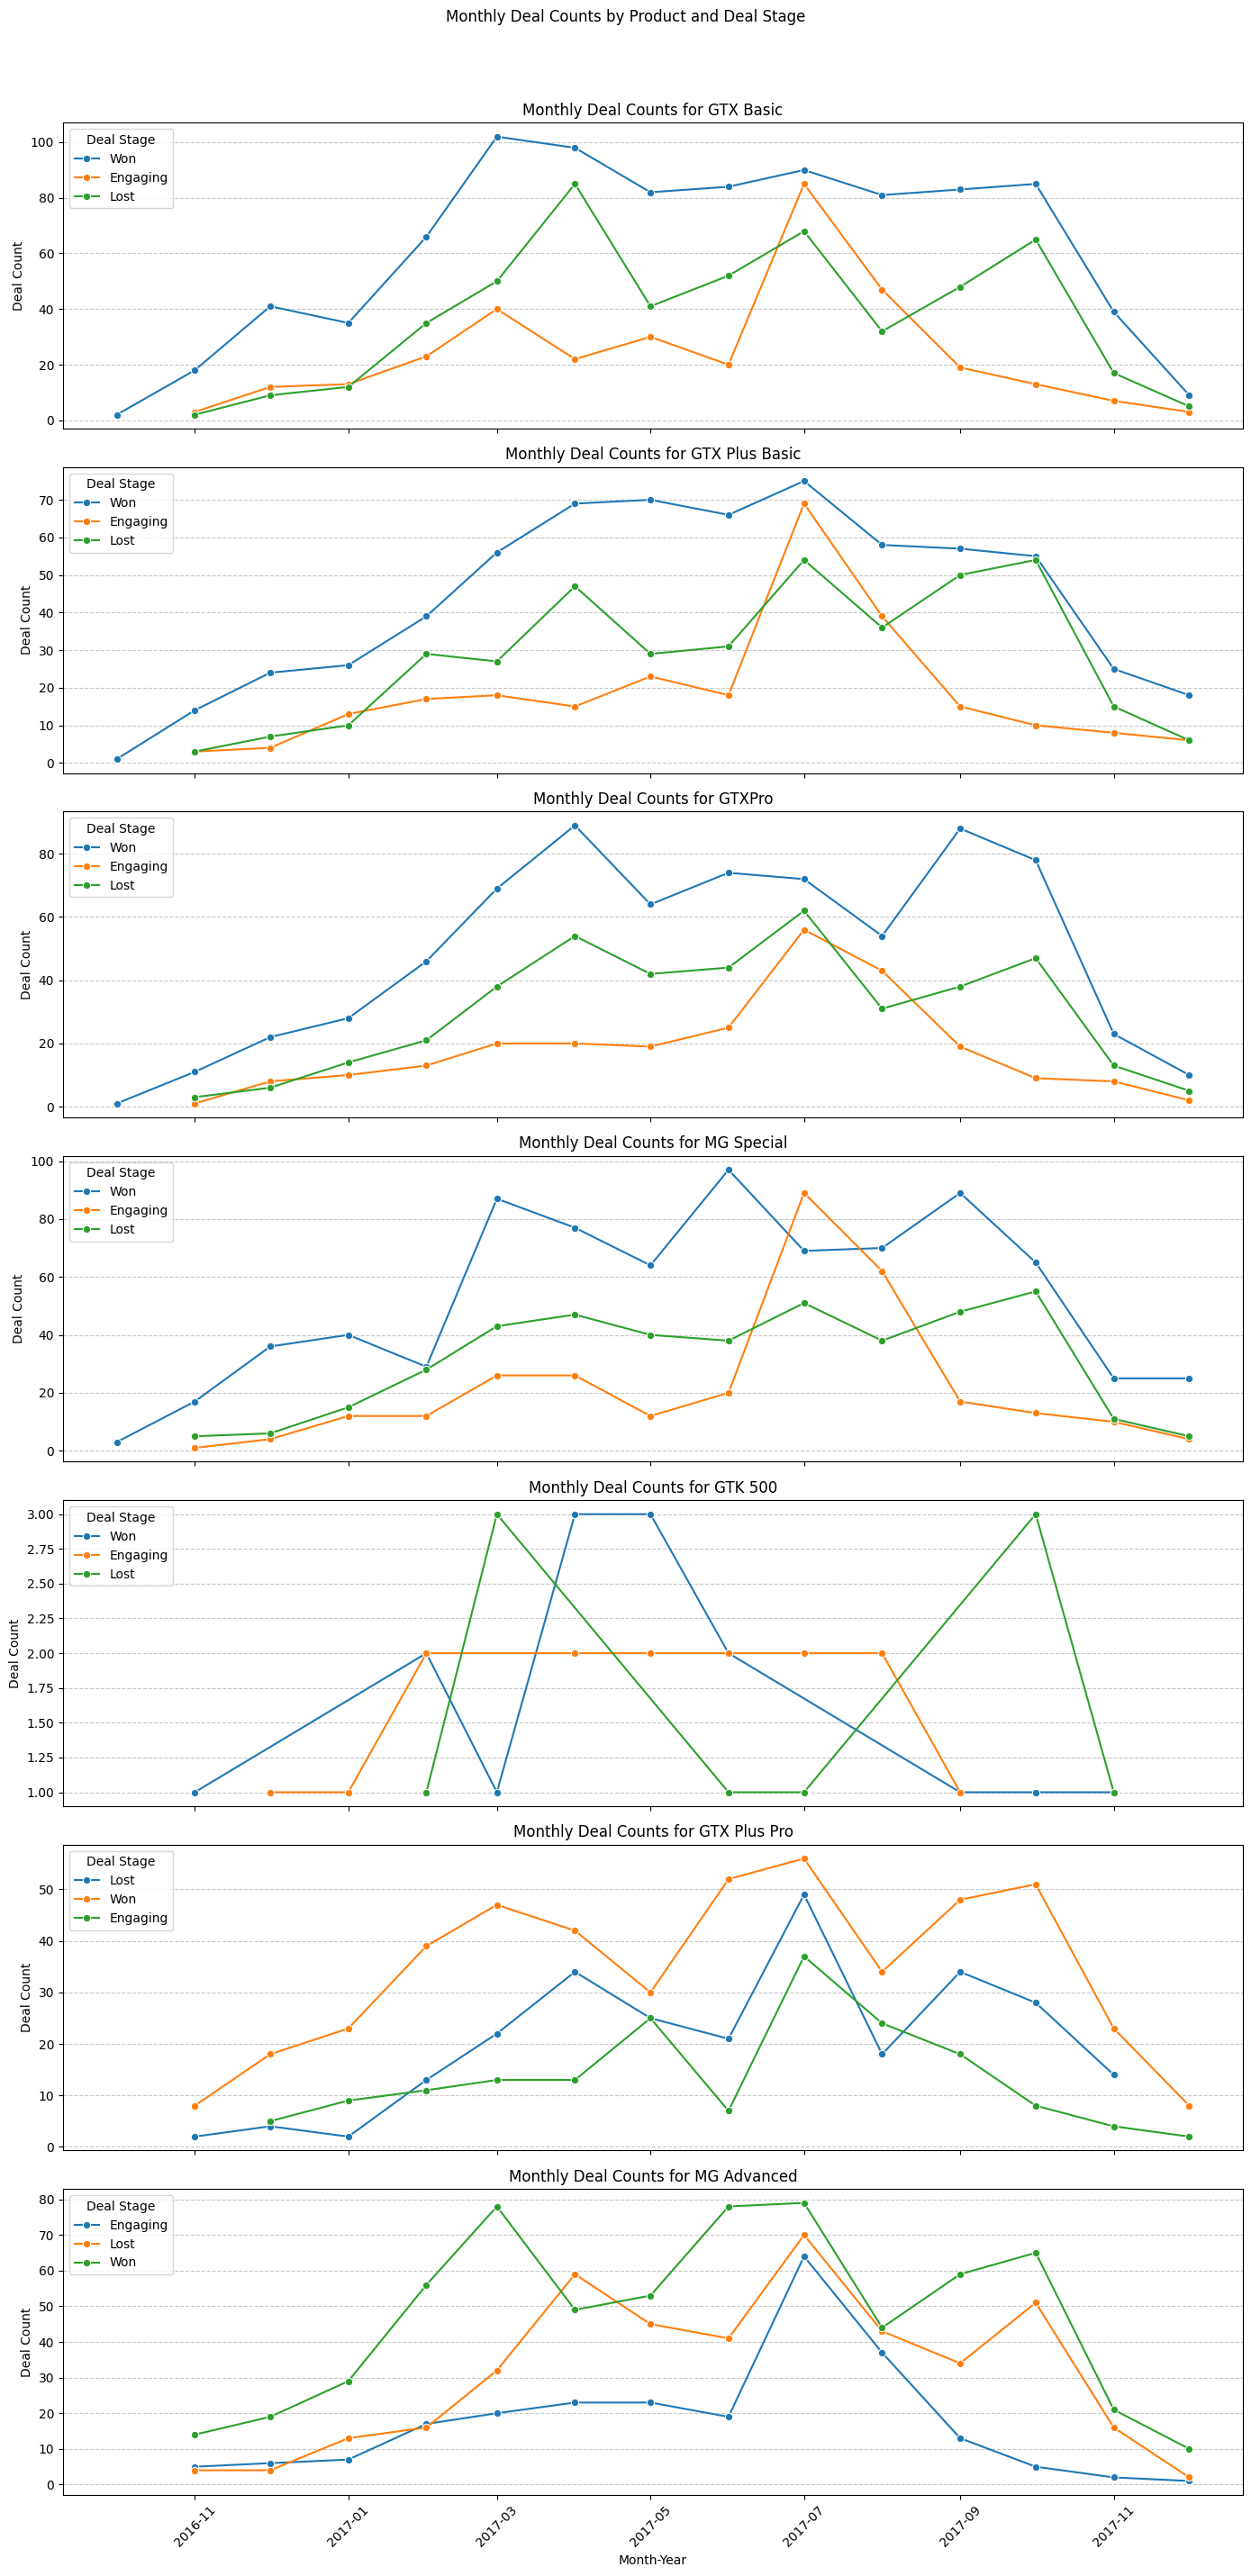

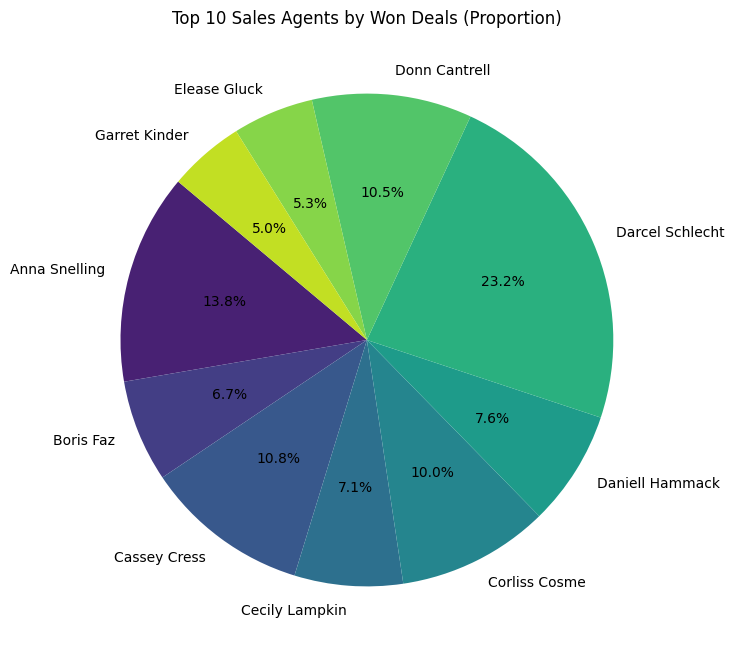

In [72]:
# Step 1: Distribution of Deal Stages
plt.figure(figsize=(8, 8))
deal_stage_counts = df_sales_pipeline['deal_stage'].value_counts()
plt.pie(deal_stage_counts, labels=deal_stage_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(deal_stage_counts)))
plt.title("Percentage Distribution of Deal Stages")
plt.show()

# Convert engage_date to datetime for time-based analysis
df_sales_pipeline['engage_date'] = pd.to_datetime(df_sales_pipeline['engage_date'], errors='coerce')

# Step 2: Monthly Opportunity Counts
plt.figure(figsize=(14, 6))
monthly_opportunities = df_sales_pipeline['engage_date'].dt.to_period('M').value_counts().sort_index()
monthly_opportunities.plot(kind='line', marker='o', linestyle='-', color='royalblue')
plt.title("Number of Opportunities by Month (Engage Date)")
plt.xlabel("Engage Date (Monthly)")
plt.ylabel("Opportunity Count")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Step 3: Daily Opportunity Counts
plt.figure(figsize=(14, 6))
daily_opportunities = df_sales_pipeline['engage_date'].value_counts().sort_index()
daily_opportunities.plot(kind='line', color='royalblue')
plt.title("Number of Opportunities by Day (Engage Date)")
plt.xlabel("Engage Date (Daily)")
plt.ylabel("Opportunity Count")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Monthly Revenue for Won Deals
df_sales_pipeline['close_date'] = pd.to_datetime(df_sales_pipeline['close_date'], errors='coerce')
won_deals = df_sales_pipeline[df_sales_pipeline['deal_stage'] == 'Won']
monthly_revenue_won = won_deals.groupby(won_deals['close_date'].dt.to_period('M')).agg(total_revenue=('close_value', 'sum')).reset_index()
monthly_revenue_won['close_date'] = monthly_revenue_won['close_date'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue_won['close_date'], monthly_revenue_won['total_revenue'], marker='o', linestyle='-', color='royalblue')
plt.title("Monthly Revenue from Closed (Won) Opportunities")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Duration Distribution of Sales Cycles
df_sales_pipeline['duration'] = (df_sales_pipeline['close_date'] - df_sales_pipeline['engage_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df_sales_pipeline['duration'].dropna(), kde=True, color='royalblue')
plt.title("Distribution of Sales Cycle Duration")
plt.xlabel("Duration (Days)")
plt.ylabel("Count")
plt.show()

# Step 6: Total Revenue by Product
product_revenue = df_sales_pipeline.groupby('product')['close_value'].sum().reset_index()

# Step 6: Total Revenue by Product as a Pie Chart (if limited number of products)
if len(product_revenue) <= 10:  # Use pie chart if number of products is manageable
    plt.figure(figsize=(8, 8))
    plt.pie(product_revenue['close_value'], labels=product_revenue['product'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(product_revenue)))
    plt.title("Percentage of Total Revenue by Product")
    plt.show()
else:
    # Fall back to bar chart if there are too many products for a pie chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x='close_value', y='product', data=product_revenue, color='royalblue')
    plt.title("Total Revenue by Product")
    plt.xlabel("Total Revenue (in millions of USD)")
    plt.ylabel("Product")
    plt.xticks(rotation=45)
    plt.show()

# Step 7: Monthly Deal Counts by Product and Deal Stage
df_sales_pipeline['month_year'] = df_sales_pipeline['engage_date'].dt.to_period('M').dt.to_timestamp()
monthly_deals = df_sales_pipeline.groupby(['month_year', 'product', 'deal_stage']).size().reset_index(name='deal_count')
unique_products = monthly_deals['product'].unique()
num_products = len(unique_products)

fig, axes = plt.subplots(num_products, 1, figsize=(14, num_products * 4), sharex=True)

for i, product in enumerate(unique_products):
    product_data = monthly_deals[monthly_deals['product'] == product]
    sns.lineplot(data=product_data, x='month_year', y='deal_count', hue='deal_stage', ax=axes[i], marker="o")
    axes[i].set_title(f"Monthly Deal Counts for {product}")
    axes[i].set_xlabel("Month-Year")
    axes[i].set_ylabel("Deal Count")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(title="Deal Stage", loc='upper left')

plt.suptitle("Monthly Deal Counts by Product and Deal Stage", y=1.02)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Top Sales Agents by Won Deals and Revenue
agent_won_stats = df_sales_pipeline[df_sales_pipeline['deal_stage'] == 'Won'].groupby('sales_agent').agg(total_won_deals=('deal_stage', 'count'), total_revenue=('close_value', 'sum')).reset_index()
top_agents = agent_won_stats.head(10)  # Top 10 agents by won deals
plt.figure(figsize=(8, 8))
plt.pie(top_agents['total_won_deals'], labels=top_agents['sales_agent'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 10))
plt.title("Top 10 Sales Agents by Won Deals (Proportion)")
plt.show()

### sales_profitability

In [137]:
query_sales_profitability=""" select * from `crmhetic.crmhetic_silver.sales_profitability` """
query_job = client.query(query_sales_profitability)
results = query_job.result()
# to dataframe
df_sales_profitability = results.to_dataframe()

/Users/camille/repo/Hetic/repo_M2/eval_certifiante/etl/dbt_crm_venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


#### Step 1: Data Preparation - Separate Won and Lost Deals

First, filter the dataset to create separate won_deals and lost_deals DataFrames for targeted analysis.

In [138]:
# Separate Won and Lost deals
won_deals = df_sales_profitability[df_sales_profitability['deal_stage'] == 'Won']
lost_deals = df_sales_profitability[df_sales_profitability['deal_stage'] == 'Lost']

#### Step 2: Revenue Analysis by Product (Only for Won Deals)

Focus on won_deals to analyze revenue generation by product. This ensures we’re only considering successful closures when assessing revenue.

In [75]:
# Group by product to calculate revenue and margin for Won deals
won_product_stats = won_deals.groupby('product').agg(
    total_revenue=('close_value', 'sum'),
    average_margin=('sales_margin', 'mean'),
    min_margin=('sales_margin', 'min'),
    max_margin=('sales_margin', 'max'),
    deal_count=('deal_stage', 'count')
).reset_index()

won_product_stats

,product,total_revenue,average_margin,min_margin,max_margin,deal_count
0,GTK 500,400612,-60.533333,-3022,3520,15
1,GTX Basic,499263,-4.357377,-185,166,915
2,GTX Plus Basic,705275,-15.946401,-344,278,653
3,GTX Plus Pro,2629651,7.876827,-1778,1874,479
4,MG Advanced,2216387,-4.029052,-916,1063,654
5,MG Special,43768,0.192938,-17,17,793


#### Step 3: Sales Cycle Duration Analysis (Won and Lost Deals)

For sales_cycle_days, use both won_deals and lost_deals to see if cycle durations vary between successful and unsuccessful deals.

In [76]:
# Descriptive statistics for sales_cycle_days by deal stage
cycle_duration_stats = df_sales_profitability.groupby('deal_stage')['sales_cycle_days'].describe()
cycle_duration_stats


,count,mean,std,min,25%,50%,75%,max
deal_stage,,,,,,,,
Engaging,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Lost,2055.0,41.532847,40.057855,1.0,7.0,14.0,78.0,138.0
Prospecting,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Won,3509.0,52.499858,41.247685,1.0,9.0,59.0,89.0,138.0


Text(0, 0.5, 'Sales Cycle Duration (Days)')

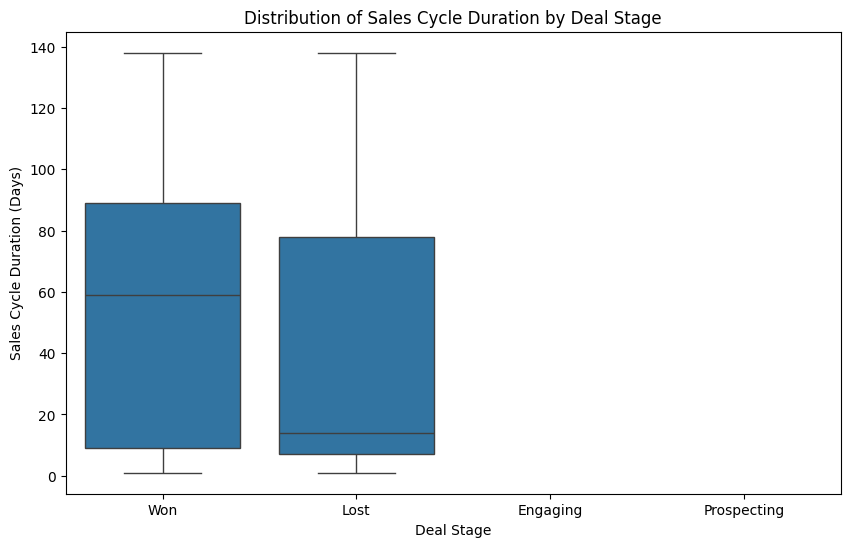

In [77]:
#cycle_duration_stats graph
plt.figure(figsize=(10, 6))
sns.boxplot(x='deal_stage', y='sales_cycle_days', data=df_sales_profitability)
plt.title("Distribution of Sales Cycle Duration by Deal Stage")
plt.xlabel("Deal Stage")
plt.ylabel("Sales Cycle Duration (Days)")

#### Step 4: Visualization



##### 1. Total Revenue by Product (Won Deals Only)

This bar plot highlights the total revenue generated by each product for successfully closed deals.

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/2199437915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product', data=won_product_stats, palette="Blues")


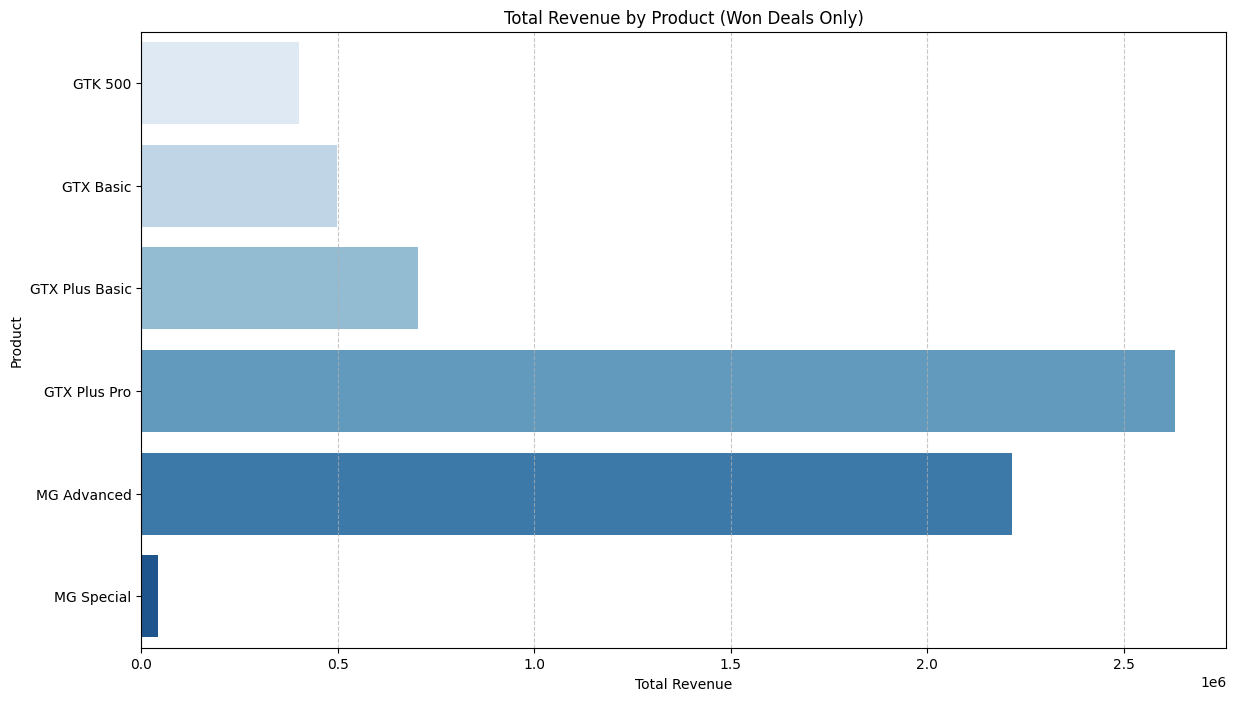

In [78]:

plt.figure(figsize=(14, 8))
sns.barplot(x='total_revenue', y='product', data=won_product_stats, palette="Blues")
plt.title("Total Revenue by Product (Won Deals Only)")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 2. Sales Cycle Duration by Deal Stage (Won and Lost)

This box plot shows the distribution of sales_cycle_days for both Won and Lost deals, providing insights into cycle duration differences between successful and unsuccessful deals.

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/1562717167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deal_stage', y='sales_cycle_days', data=df_sales_profitability, palette="Set2")


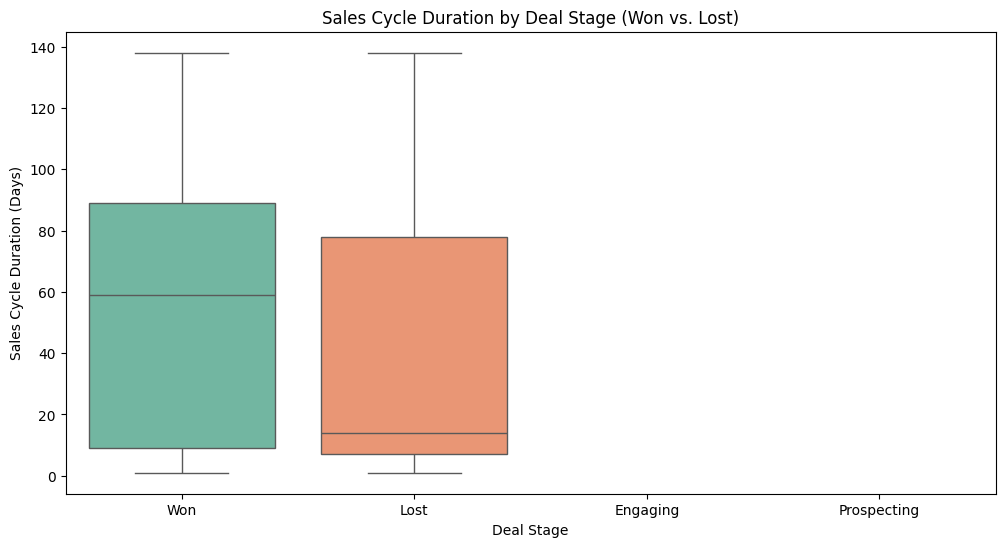

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='deal_stage', y='sales_cycle_days', data=df_sales_profitability, palette="Set2")
plt.title("Sales Cycle Duration by Deal Stage (Won vs. Lost)")
plt.xlabel("Deal Stage")
plt.ylabel("Sales Cycle Duration (Days)")
plt.show()

##### 3. Revenue per Sales Cycle Day (Won Deals Only)


Descriptive Statistics for Revenue per Sales Cycle Day (Won Deals):
 count        3509.0
mean     188.080017
std      807.666993
min        0.301471
25%        6.290323
50%       30.140496
75%       88.423077
max         27971.0
Name: revenue_per_day, dtype: Float64


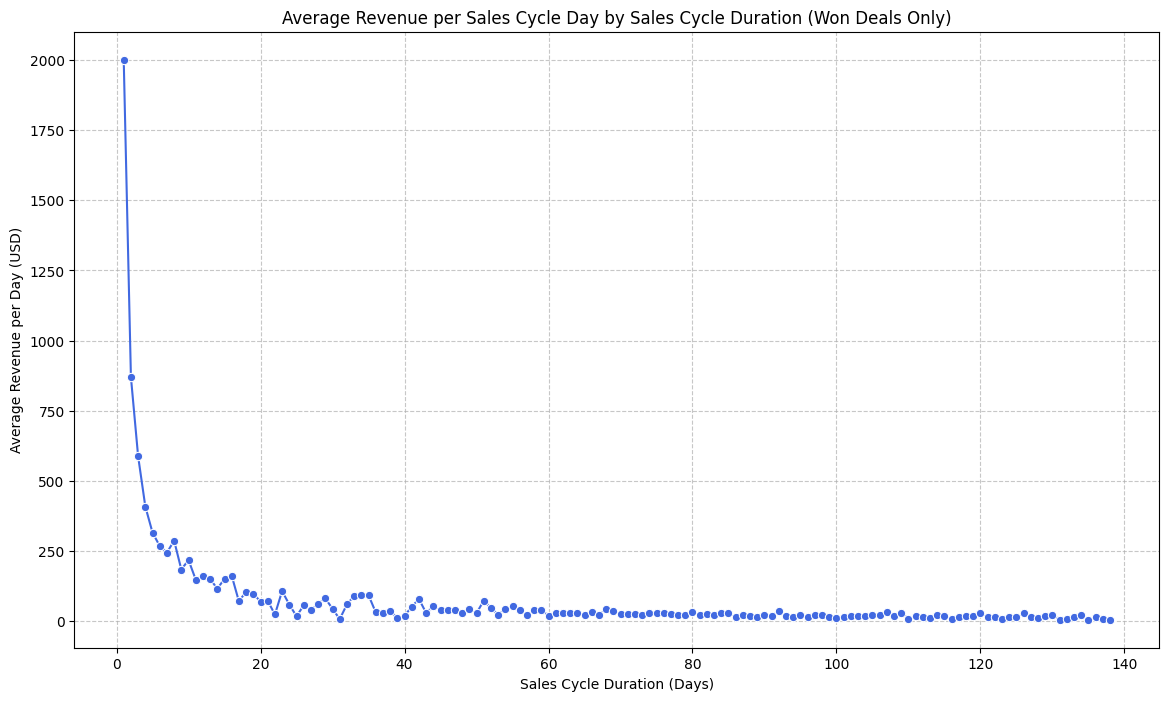

In [80]:
# Calculate Revenue per Sales Cycle Day for each won deal
# Avoid division by zero by filtering out deals with sales_cycle_days == 0
won_deals = won_deals[won_deals['sales_cycle_days'] > 0]
won_deals['revenue_per_day'] = won_deals['close_value'] / won_deals['sales_cycle_days']

# Descriptive statistics for Revenue per Sales Cycle Day
revenue_per_day_stats = won_deals['revenue_per_day'].describe()
print("Descriptive Statistics for Revenue per Sales Cycle Day (Won Deals):\n", revenue_per_day_stats)


# Optional: Group by Sales Cycle Days to see average revenue per day by duration
avg_revenue_by_cycle_day = won_deals.groupby('sales_cycle_days')['revenue_per_day'].mean().reset_index()

# Plotting average revenue per day by sales cycle days
plt.figure(figsize=(14, 8))
sns.lineplot(x='sales_cycle_days', y='revenue_per_day', data=avg_revenue_by_cycle_day, marker='o', color='royalblue')
plt.title("Average Revenue per Sales Cycle Day by Sales Cycle Duration (Won Deals Only)")
plt.xlabel("Sales Cycle Duration (Days)")
plt.ylabel("Average Revenue per Day (USD)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

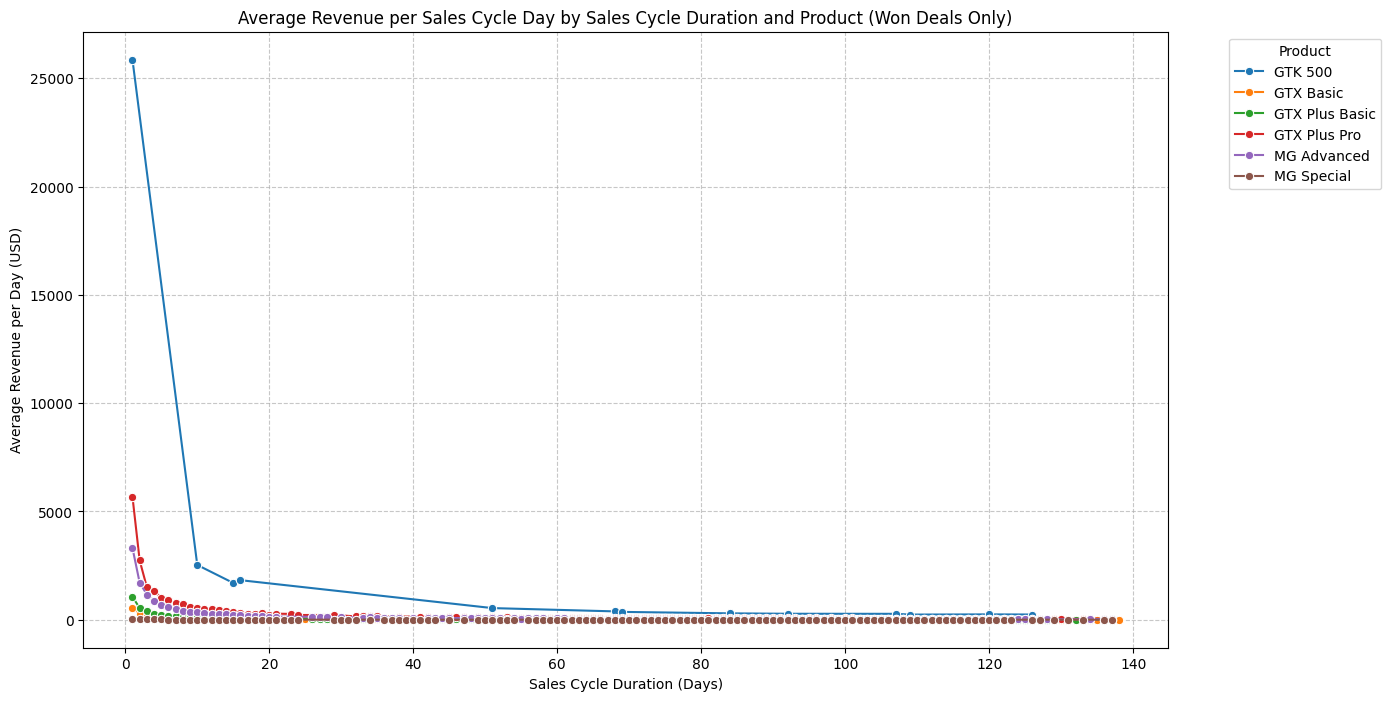

In [81]:
# Group by sales_cycle_days and product to calculate average revenue per day
avg_revenue_by_cycle_product = won_deals.groupby(['sales_cycle_days', 'product'])['revenue_per_day'].mean().reset_index()

# Plotting average revenue per day by sales cycle days, separated by product
plt.figure(figsize=(14, 8))
sns.lineplot(x='sales_cycle_days', y='revenue_per_day', hue='product', data=avg_revenue_by_cycle_product, marker='o')
plt.title("Average Revenue per Sales Cycle Day by Sales Cycle Duration and Product (Won Deals Only)")
plt.xlabel("Sales Cycle Duration (Days)")
plt.ylabel("Average Revenue per Day (USD)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/2063729452.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_cycle_days', y='revenue_per_day', data=top_profitable_cycles, palette='Blues_r')


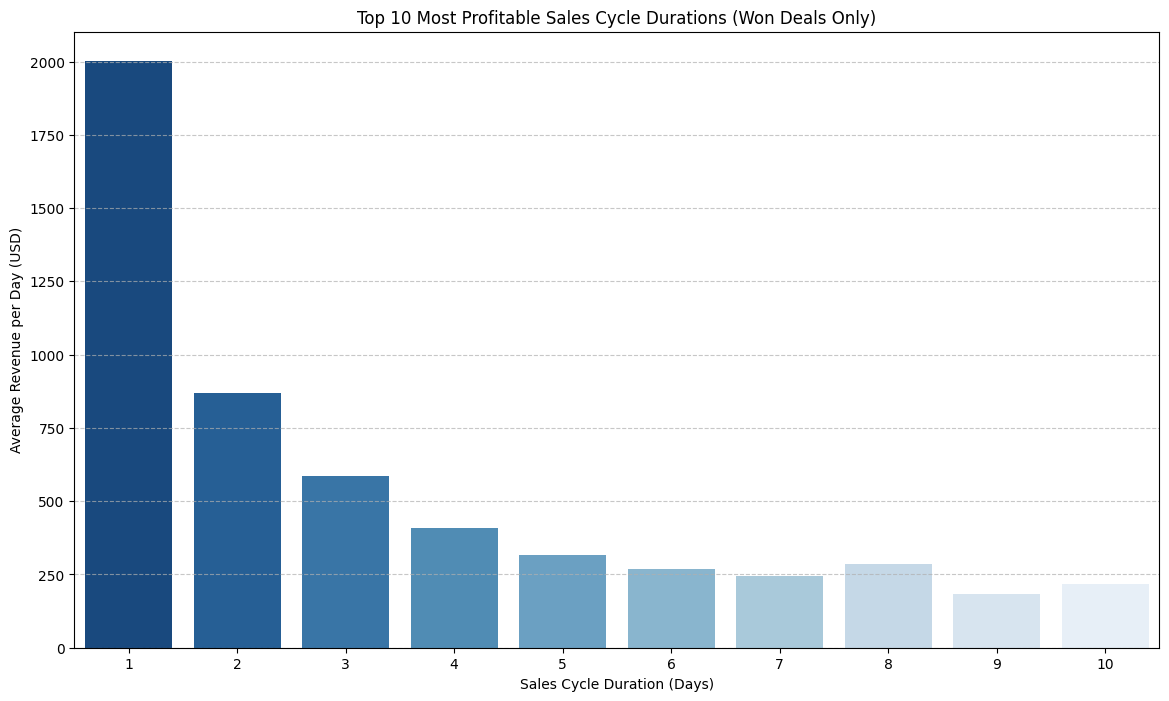

In [82]:
avg_revenue_by_cycle_day = won_deals.groupby('sales_cycle_days')['revenue_per_day'].mean().reset_index()

# Sort by average revenue per day in descending order and select the top 10 most profitable durations
top_profitable_cycles = avg_revenue_by_cycle_day.sort_values(by='revenue_per_day', ascending=False).head(10)

# Plotting the most profitable sales cycle durations
plt.figure(figsize=(14, 8))
sns.barplot(x='sales_cycle_days', y='revenue_per_day', data=top_profitable_cycles, palette='Blues_r')
plt.title("Top 10 Most Profitable Sales Cycle Durations (Won Deals Only)")
plt.xlabel("Sales Cycle Duration (Days)")
plt.ylabel("Average Revenue per Day (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

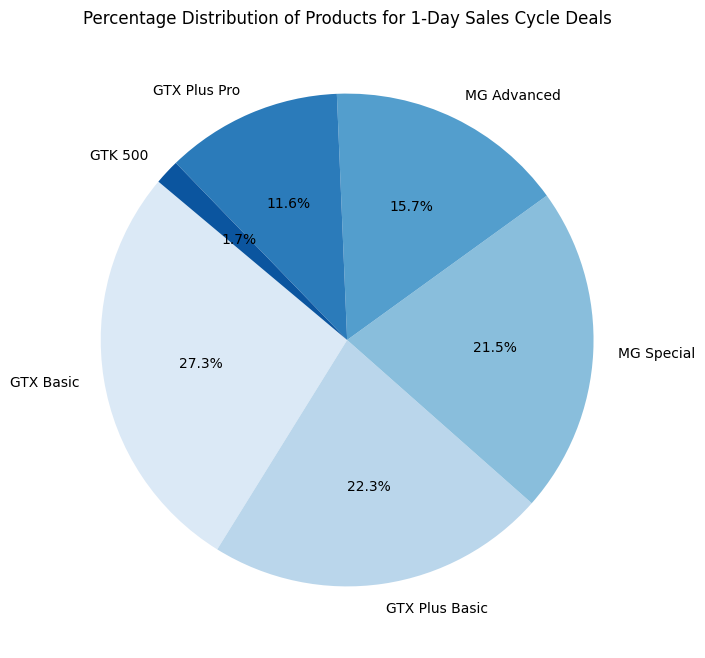

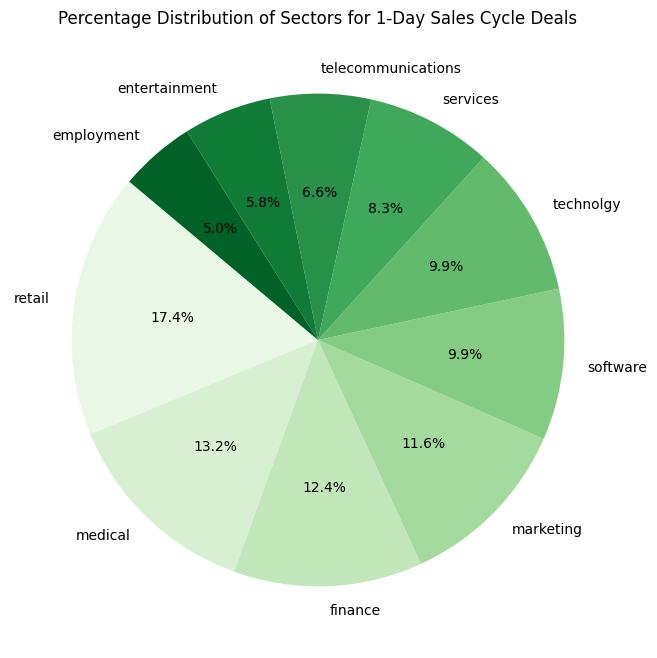

In [83]:
# Step 1: Filter for deals with sales_cycle_days equal to 1
one_day_deals = won_deals[won_deals['sales_cycle_days'] == 1]

# Step 2: Calculate percentage distribution for categorical variables
product_distribution = one_day_deals['product'].value_counts(normalize=True) * 100
sector_distribution = one_day_deals['sector'].value_counts(normalize=True) * 100
deal_stage_distribution = one_day_deals['deal_stage'].value_counts(normalize=True) * 100

# Plotting as pie charts

# Pie chart for 'product' distribution
plt.figure(figsize=(8, 8))
plt.pie(product_distribution, labels=product_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", len(product_distribution)))
plt.title("Percentage Distribution of Products for 1-Day Sales Cycle Deals")
plt.show()

# Pie chart for 'sector' distribution
plt.figure(figsize=(8, 8))
plt.pie(sector_distribution, labels=sector_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Greens", len(sector_distribution)))
plt.title("Percentage Distribution of Sectors for 1-Day Sales Cycle Deals")
plt.show()



#### 4. Revenue per sector (Won Deals Only) and after product and sector


##### Step 1: Revenue per Sector (Won Deals Only)

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/1541839194.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='sector', data=sector_revenue, palette='viridis')


Revenue per Sector (Won Deals Only):
                sector  total_revenue
0              retail        1210093
1           technolgy         933461
2             medical         927174
3            software         663677
4             finance         606345
5           marketing         591634
6       entertainment         507337
7  telecommunications         448611
8            services         313999
9          employment         292625


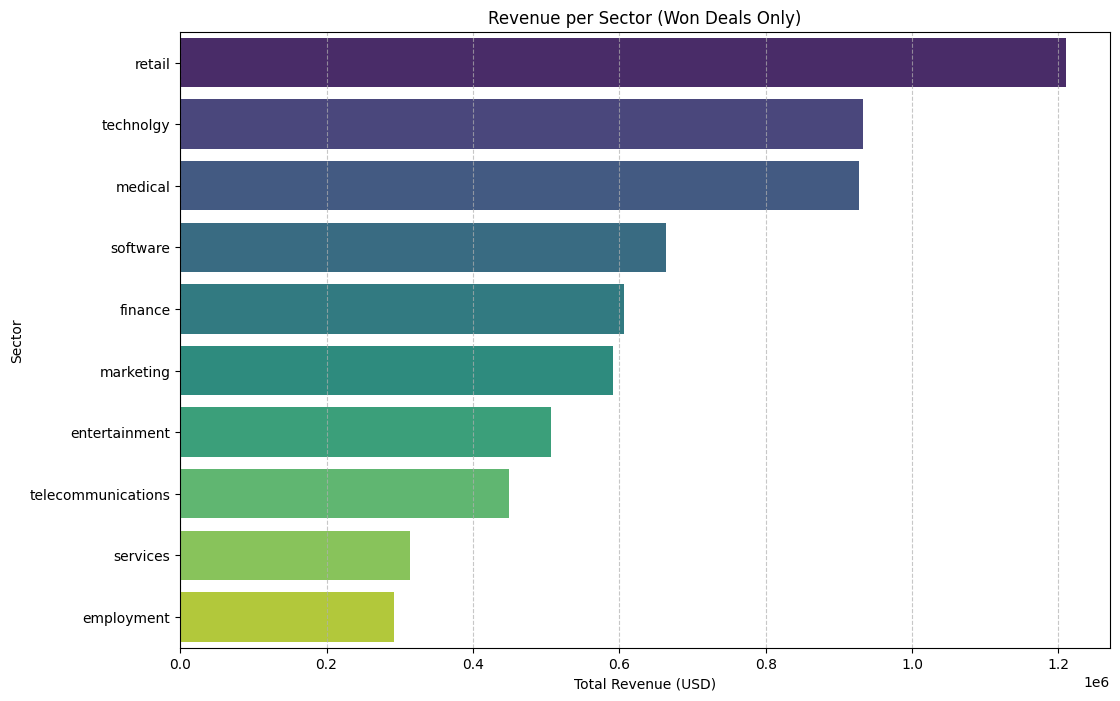

In [84]:
# Group by sector to calculate total revenue for each sector
sector_revenue = won_deals.groupby('sector')['close_value'].sum().reset_index()
sector_revenue = sector_revenue.sort_values(by='close_value', ascending=False).reset_index(drop=True)
sector_revenue.rename(columns={'close_value': 'total_revenue'}, inplace=True)

print("Revenue per Sector (Won Deals Only):\n", sector_revenue)

# Plotting the revenue per sector for Won deals only
plt.figure(figsize=(12, 8))
sns.barplot(x='total_revenue', y='sector', data=sector_revenue, palette='viridis')
plt.title("Revenue per Sector (Won Deals Only)")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Sector")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### Step 2: Revenue per Sector and Product (Won Deals Only)

Revenue per Product within Each Sector (Won Deals Only):
                 sector         product  total_revenue
0           employment     MG Advanced         101472
1           employment    GTX Plus Pro          90644
2           employment         GTK 500          50033
3           employment       GTX Basic          24443
4           employment  GTX Plus Basic          24196
5           employment      MG Special           1837
6        entertainment     MG Advanced         176614
7        entertainment    GTX Plus Pro         145196
8        entertainment         GTK 500         108498
9        entertainment  GTX Plus Basic          43191
10       entertainment       GTX Basic          31439
11       entertainment      MG Special           2399
12             finance    GTX Plus Pro         232519
13             finance     MG Advanced         211039
14             finance  GTX Plus Basic          66784
15             finance         GTK 500          55406
16             finance  

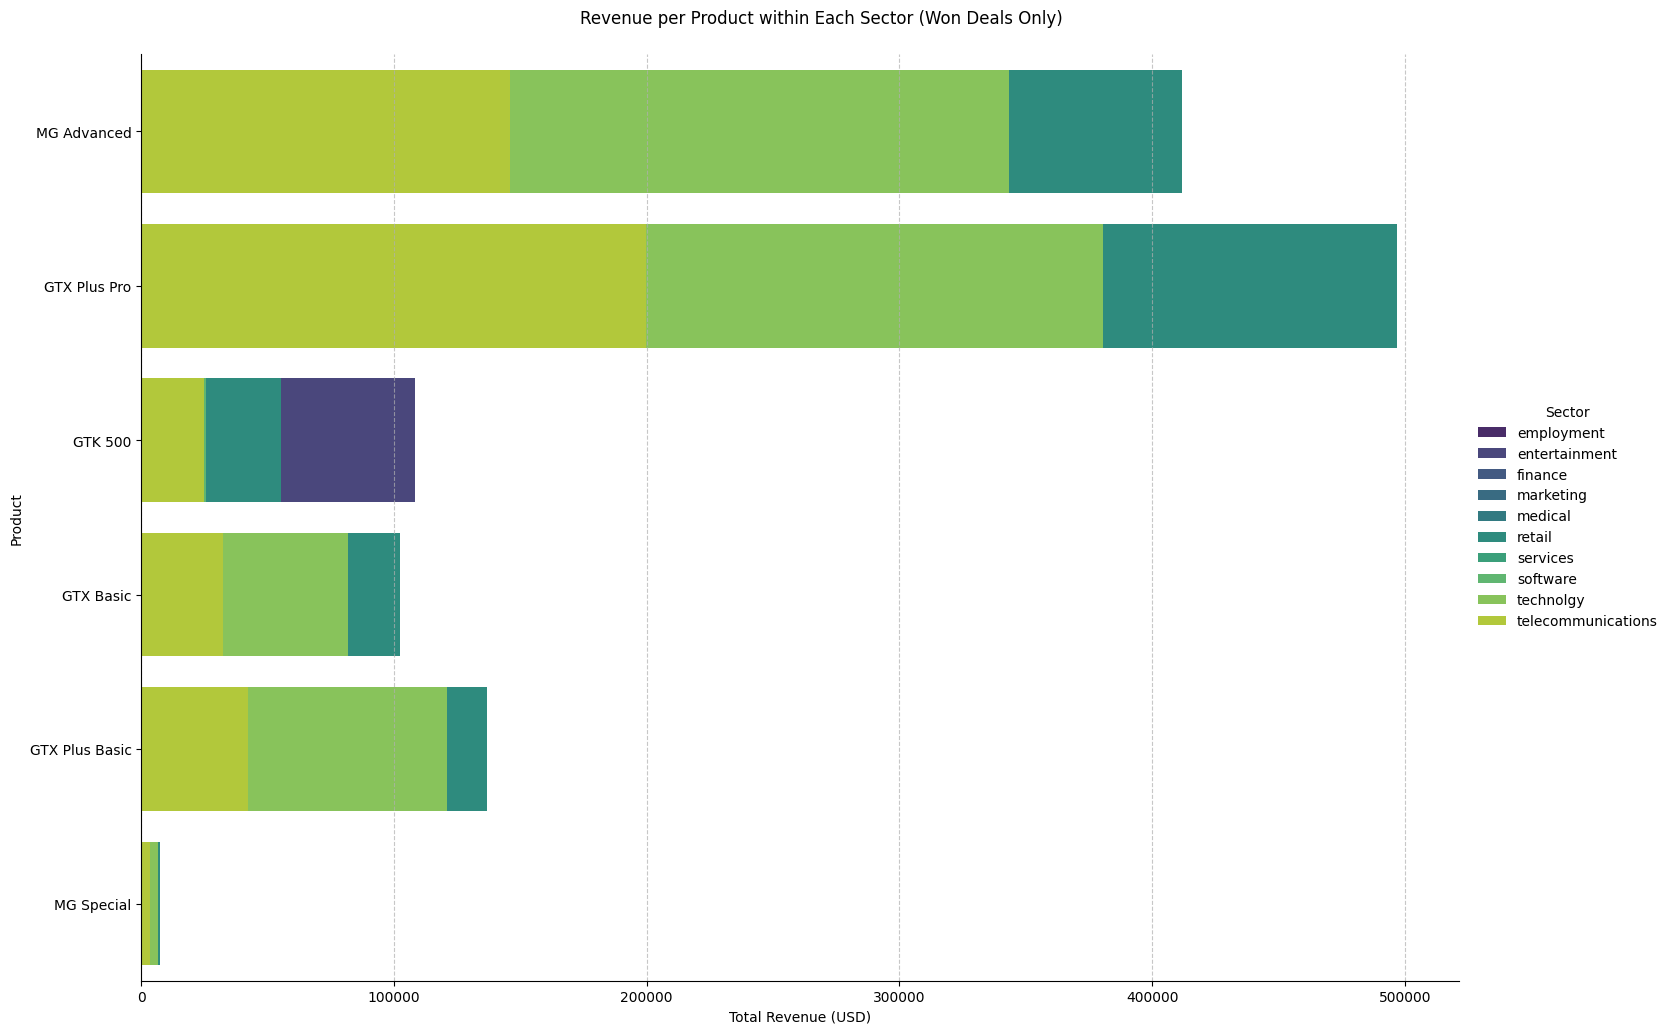

In [85]:
# Group by sector and product to calculate total revenue for each product within each sector
sector_product_revenue = won_deals.groupby(['sector', 'product'])['close_value'].sum().reset_index()
sector_product_revenue = sector_product_revenue.sort_values(by=['sector', 'close_value'], ascending=[True, False]).reset_index(drop=True)
sector_product_revenue.rename(columns={'close_value': 'total_revenue'}, inplace=True)

print("Revenue per Product within Each Sector (Won Deals Only):\n", sector_product_revenue)

# Plotting the revenue per product within each sector using a FacetGrid
g = sns.catplot(
    data=sector_product_revenue, kind="bar",
    x="total_revenue", y="product", hue="sector",
    palette="viridis", height=10, aspect=1.5, dodge=False
)
g.set_axis_labels("Total Revenue (USD)", "Product")
g._legend.set_title("Sector")
g.fig.suptitle("Revenue per Product within Each Sector (Won Deals Only)", y=1.03)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### Revenue by office_location (Won Deals Only)

In [139]:
revenue_by_location = won_deals.groupby('office_location')['close_value'].sum().reset_index()


/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/169279532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='close_value', y='office_location', data=revenue_by_location, palette='viridis')


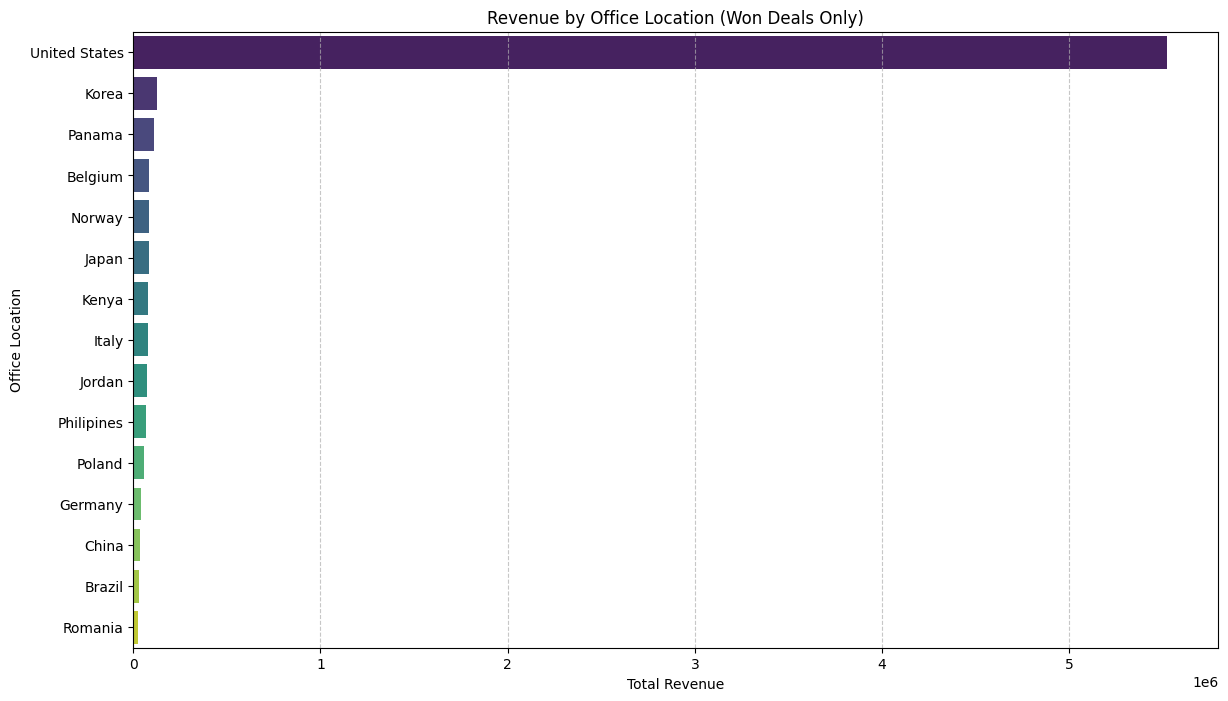

In [142]:

# Step 3: Sort locations by total revenue in descending order for better visualization
revenue_by_location = revenue_by_location.sort_values(by='close_value', ascending=False).reset_index(drop=True)

# Step 4: Plotting revenue by office location
plt.figure(figsize=(14, 8))
sns.barplot(x='close_value', y='office_location', data=revenue_by_location, palette='viridis')
plt.title("Revenue by Office Location (Won Deals Only)")
plt.xlabel("Total Revenue")
plt.ylabel("Office Location")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

###### Revenue by reginoal office location

In [144]:
query="""SELECT
  *
FROM
  `crmhetic.crmhetic_silver.sales_profitability`
LEFT JOIN
  crmhetic.crmhetic_bronze.sales_accounts
USING
  (sale_id)"""
query_job = client.query(query)
results = query_job.result()
# to dataframe
df= results.to_dataframe()


/Users/camille/repo/Hetic/repo_M2/eval_certifiante/etl/dbt_crm_venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Regional Office Statistics:
   regional_office  total_revenue  total_margin  average_margin  deal_count
0         Central     5015720.52      -1442367     -652.359566        2459
1            East     4001960.16      -1178923     -806.928816        1573
2            West     5986321.22      -1324017     -699.797569        2085


/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/3063109764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='regional_office', data=regional_office_stats, palette='viridis')


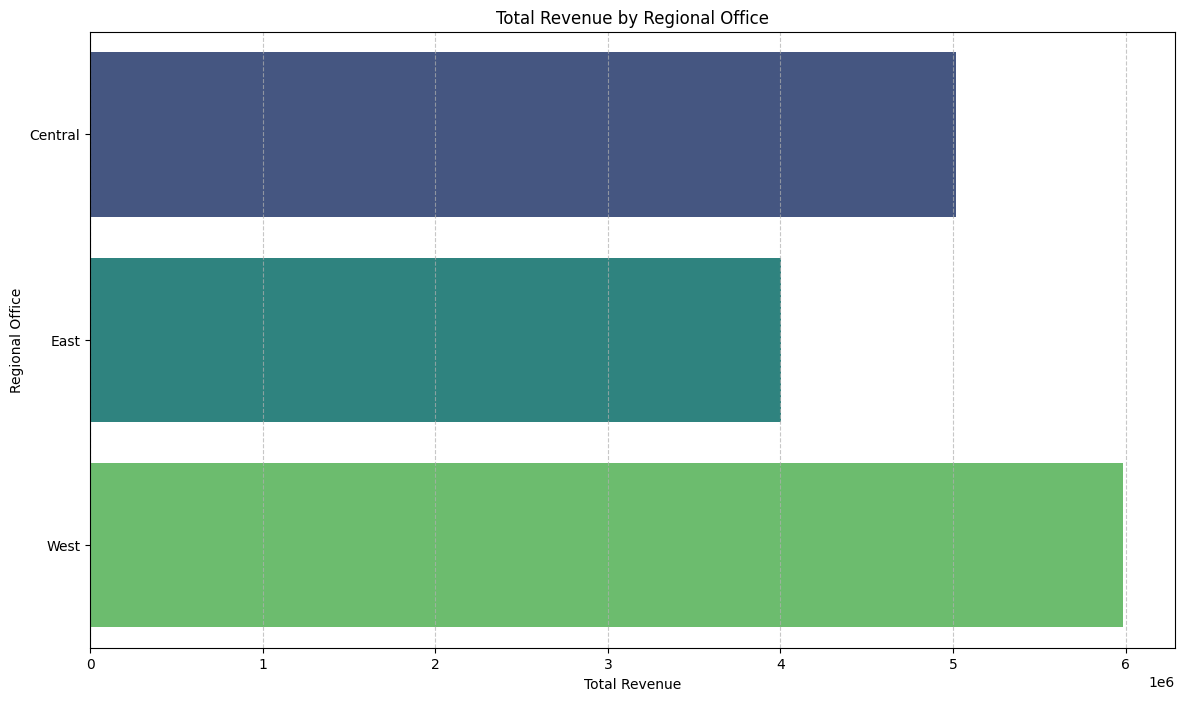

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/3063109764.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_margin', y='regional_office', data=regional_office_stats, palette='viridis')


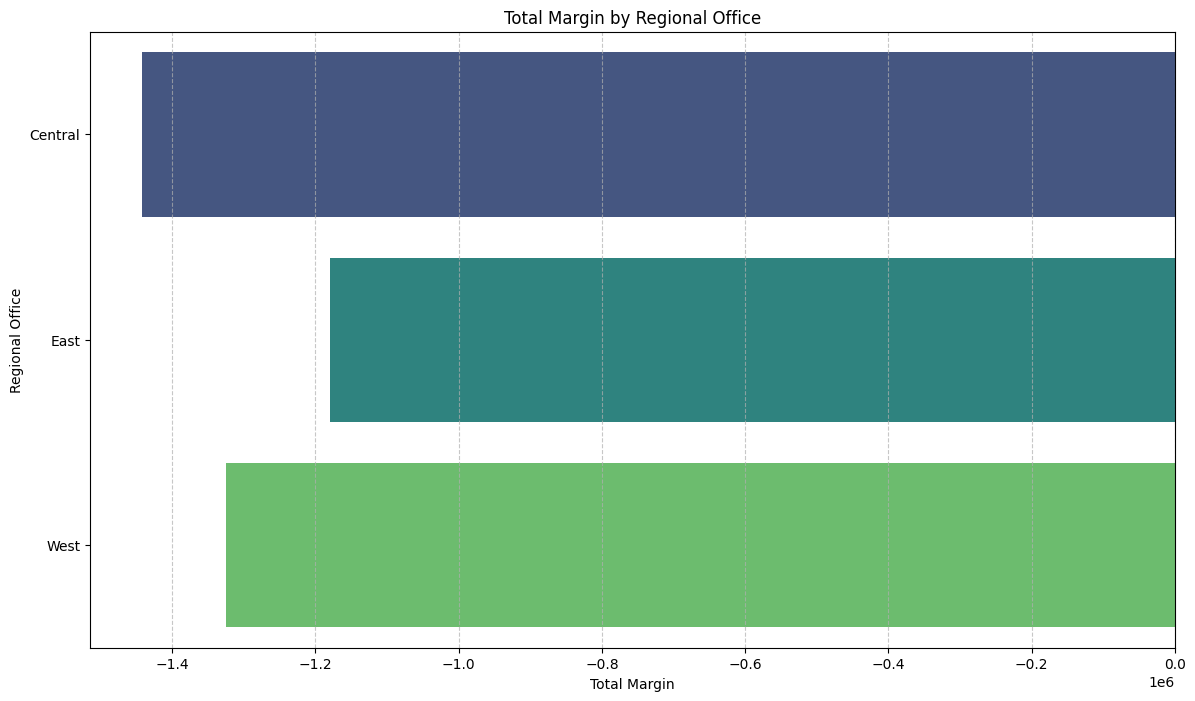

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/3063109764.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_margin', y='regional_office', data=regional_office_stats, palette='viridis')


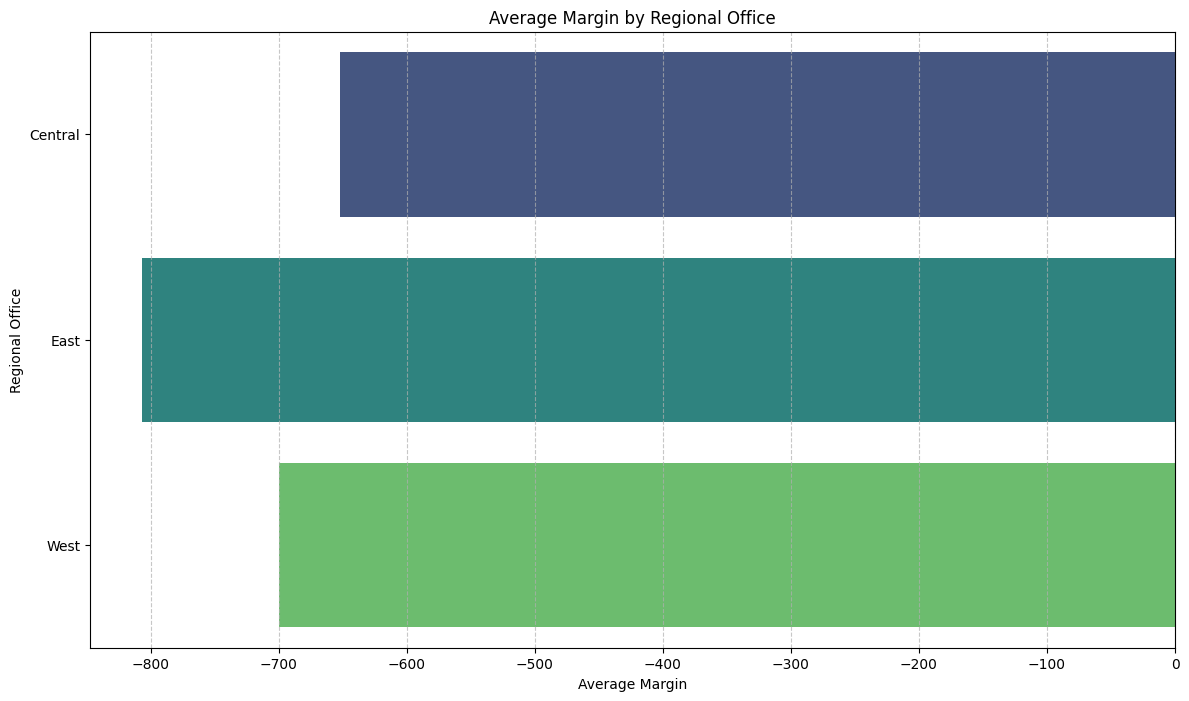

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/3063109764.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deal_count', y='regional_office', data=regional_office_stats, palette='viridis')


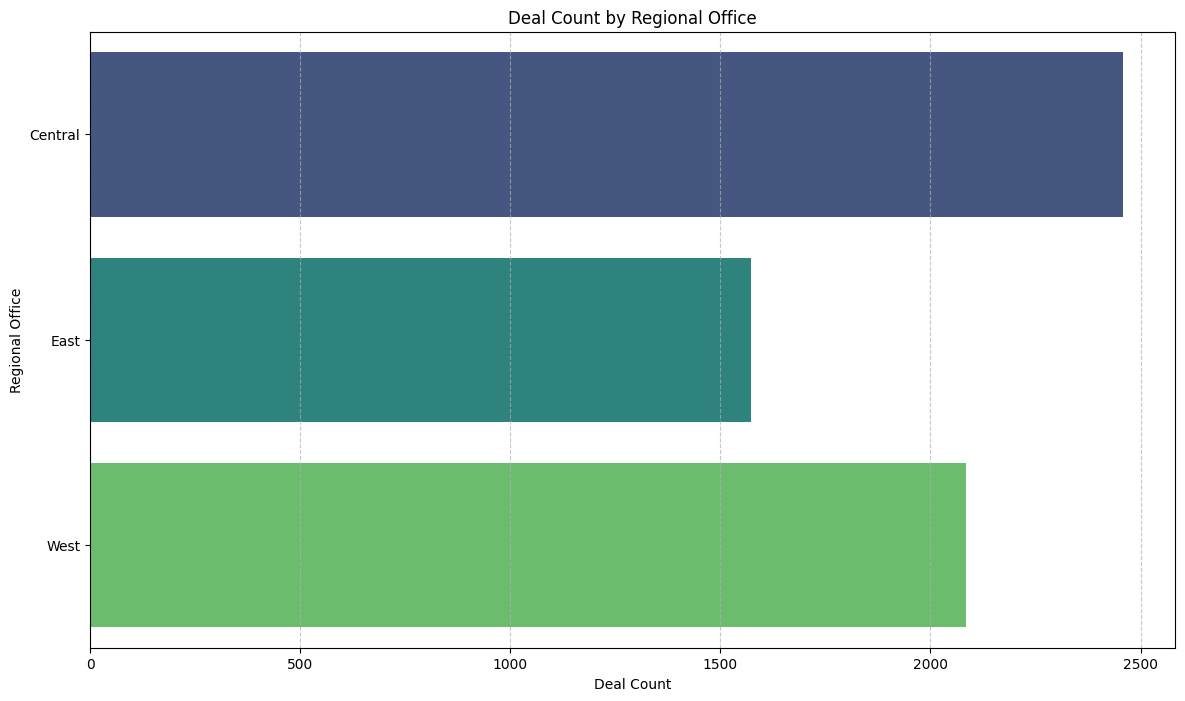

In [145]:
# Group by regional office to calculate total revenue and total margin
regional_office_stats = df.groupby('regional_office').agg(
    total_revenue=('revenue', 'sum'),
    total_margin=('sales_margin', 'sum'),
    average_margin=('sales_margin', 'mean'),
    deal_count=('sale_id', 'count')
).reset_index()

# Display the statistics
print("Regional Office Statistics:\n", regional_office_stats)

# Plotting total revenue by regional office
plt.figure(figsize=(14, 8))
sns.barplot(x='total_revenue', y='regional_office', data=regional_office_stats, palette='viridis')
plt.title("Total Revenue by Regional Office")
plt.xlabel("Total Revenue")
plt.ylabel("Regional Office")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plotting total margin by regional office
plt.figure(figsize=(14, 8))
sns.barplot(x='total_margin', y='regional_office', data=regional_office_stats, palette='viridis')
plt.title("Total Margin by Regional Office")
plt.xlabel("Total Margin")
plt.ylabel("Regional Office")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plotting average margin by regional office
plt.figure(figsize=(14, 8))
sns.barplot(x='average_margin', y='regional_office', data=regional_office_stats, palette='viridis')
plt.title("Average Margin by Regional Office")
plt.xlabel("Average Margin")
plt.ylabel("Regional Office")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plotting deal count by regional office
plt.figure(figsize=(14, 8))
sns.barplot(x='deal_count', y='regional_office', data=regional_office_stats, palette='viridis')
plt.title("Deal Count by Regional Office")
plt.xlabel("Deal Count")
plt.ylabel("Regional Office")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### 5. Margin Analysis

In [147]:
won_deals['sales_margin'].describe()

count       3509.0
mean     -3.994585
std      292.76233
min        -3022.0
25%          -59.0
50%           -1.0
75%           44.0
max         3520.0
Name: sales_margin, dtype: Float64

In [87]:
# Group by product to calculate average margin for each product
product_margin = won_deals.groupby('product')['sales_margin'].mean().reset_index()
product_margin = product_margin.sort_values(by='sales_margin', ascending=False).reset_index(drop=True)
product_margin

,product,sales_margin
0,GTX Plus Pro,7.876827
1,MG Special,0.192938
2,MG Advanced,-4.029052
3,GTX Basic,-4.357377
4,GTX Plus Basic,-15.946401
5,GTK 500,-60.533333


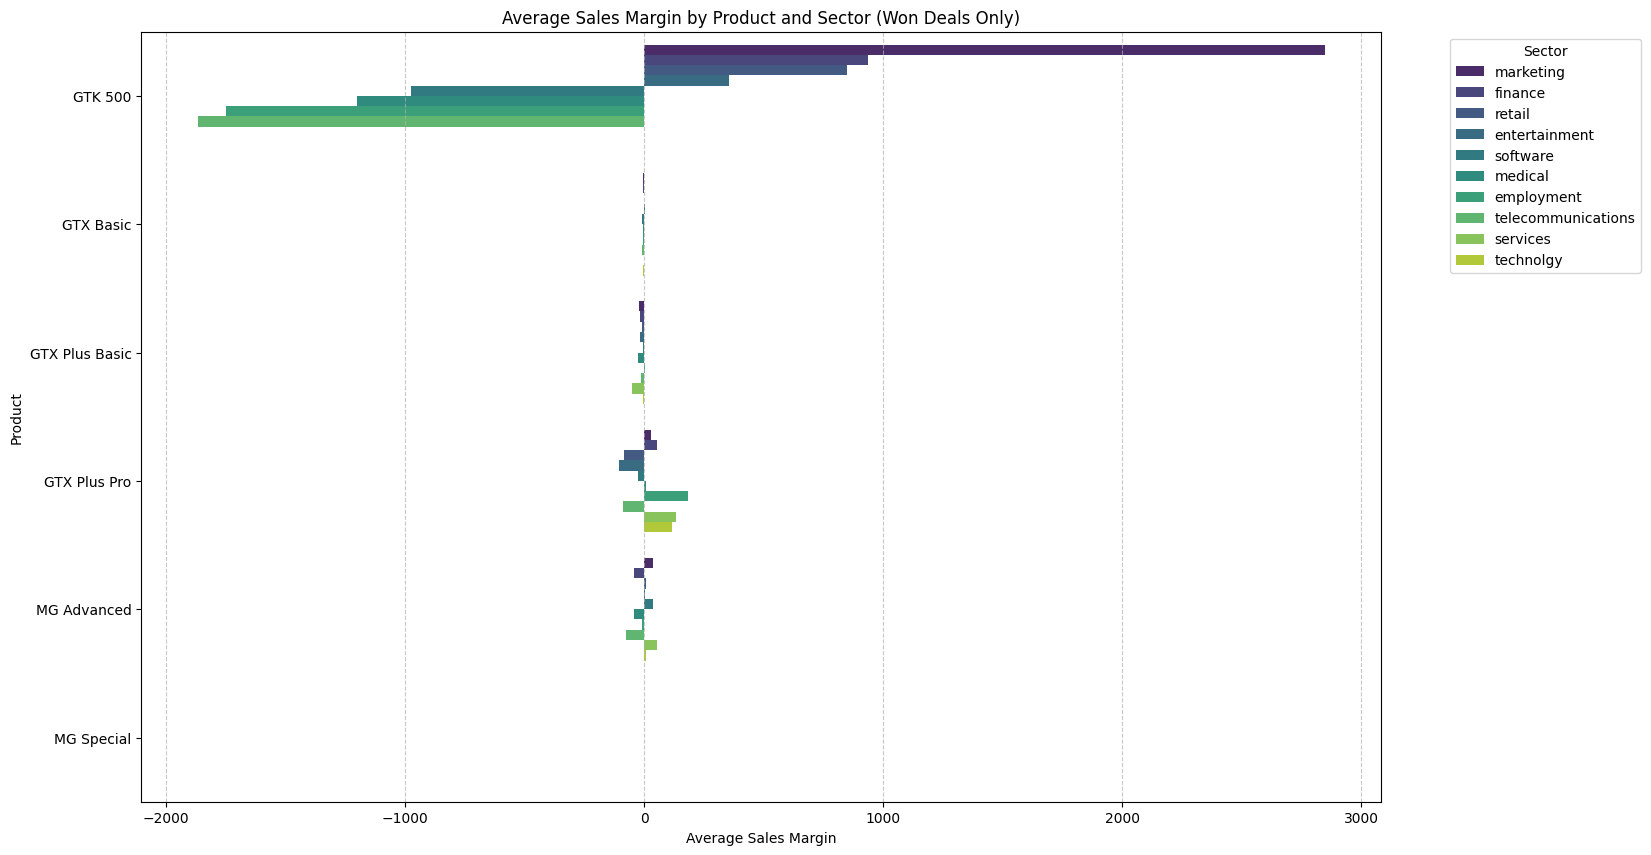

In [89]:
# Group by product to calculate average margin for each product and sector
product_sector_margin = won_deals.groupby(['product', 'sector'])['sales_margin'].mean().reset_index()
product_sector_margin = product_sector_margin.sort_values(by=['product', 'sales_margin'], ascending=[True, False]).reset_index(drop=True)
product_sector_margin
# Step 3: Plotting
plt.figure(figsize=(16, 10))
sns.barplot(x='sales_margin', y='product', hue='sector', data=product_sector_margin, palette="viridis")
plt.title("Average Sales Margin by Product and Sector (Won Deals Only)")
plt.xlabel("Average Sales Margin")
plt.ylabel("Product")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [116]:
won_deals

,account_id,account_name,sector,year_founded_at,office_location,revenue,sale_id,product_id,product,engage_at,close_at,sales_cycle_days,close_value,sales_price,deal_stage,sales_margin
0,5e395ae0c8e522beacefe393be714a8ef9dc87a2ce8628...,Funholding,finance,1991,United States,2819.50,667485fc32b9a675355ecc067aed50255e78f04f8d5a11...,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,2017-08-21,2017-11-12,83,509,550,Won,-41
2,5e395ae0c8e522beacefe393be714a8ef9dc87a2ce8628...,Funholding,finance,1991,United States,2819.50,fb09cf7f7ebc52d87b7a27d8047b943ff9cf7412646e11...,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,2017-07-30,2017-08-09,10,502,550,Won,-48
3,5e395ae0c8e522beacefe393be714a8ef9dc87a2ce8628...,Funholding,finance,1991,United States,2819.50,fb09cf7f7ebc52d87b7a27d8047b943ff9cf7412646e11...,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,2017-03-04,2017-06-22,110,496,550,Won,-54
4,5e395ae0c8e522beacefe393be714a8ef9dc87a2ce8628...,Funholding,finance,1991,United States,2819.50,667485fc32b9a675355ecc067aed50255e78f04f8d5a11...,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,2017-03-09,2017-06-17,100,571,550,Won,21
5,5e395ae0c8e522beacefe393be714a8ef9dc87a2ce8628...,Funholding,finance,1991,United States,2819.50,2d35de4b1f4ac0cfe761eb9d26e932c222c597448ff450...,0f30b37943c4082cddd938d2520cc002b609b1b71e4110...,GTX Basic,2017-05-19,2017-06-02,14,583,550,Won,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6110,3086be2a2bf6aad6a516bdbb5925992e833c7624472a5b...,Kinnamplus,retail,2004,United States,702.72,2fcd024e34a10bdb57b18c8c17bfe89a74d41f8d273260...,dab76893686dfc364e3f02bda691b5eba1ff67df59389f...,MG Advanced,2017-06-29,2017-07-11,12,3172,3393,Won,-221
6111,3086be2a2bf6aad6a516bdbb5925992e833c7624472a5b...,Kinnamplus,retail,2004,United States,702.72,3e6439d26591dd2e38f45e3e90458abb72d260222db9d2...,dab76893686dfc364e3f02bda691b5eba1ff67df59389f...,MG Advanced,2017-02-08,2017-05-22,103,3645,3393,Won,252
6113,3086be2a2bf6aad6a516bdbb5925992e833c7624472a5b...,Kinnamplus,retail,2004,United States,702.72,93fef7a2921ec55577e423e5c9817c3025980eb1c0a87f...,dab76893686dfc364e3f02bda691b5eba1ff67df59389f...,MG Advanced,2017-03-12,2017-06-27,107,3443,3393,Won,50
6114,3086be2a2bf6aad6a516bdbb5925992e833c7624472a5b...,Kinnamplus,retail,2004,United States,702.72,2fcd024e34a10bdb57b18c8c17bfe89a74d41f8d273260...,dab76893686dfc364e3f02bda691b5eba1ff67df59389f...,MG Advanced,2017-11-14,2017-11-29,15,3342,3393,Won,-51


In [ ]:
# Group by account_name to calculate total sales volume, total revenue, and total sales margin
account_profitability = won_deals.groupby('account_name').agg(
    total_sales_volume=('close_value', 'sum'),
    total_revenue=('revenue', 'sum'),
    total_sales_margin=('sales_margin', 'sum')
).reset_index()

# Find the least profitable account (most negative sales margin)
least_profitable_account = account_profitability.loc[account_profitability['total_sales_margin'].idxmin()]

# Find the most profitable account (most positive sales margin)
most_profitable_account = account_profitability.loc[account_profitability['total_sales_margin'].idxmax()]

print("Least Profitable Account:\n", least_profitable_account)
print("\nMost Profitable Account:\n", most_profitable_account)
# Rank accounts by profitability
account_profitability['profitability_rank'] = account_profitability['total_sales_margin'].rank(ascending=False)

# Plot the profitability of accounts
plt.figure(figsize=(14, 8))
sns.barplot(x='total_sales_margin', y='account_name', data=account_profitability.sort_values(by='total_sales_margin', ascending=False), palette='coolwarm')
plt.title("Profitability of Accounts")
plt.xlabel("Total Sales Margin")
plt.ylabel("Account Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Least Profitable Account:
 account_name           J-Texon
total_sales_volume       72839
total_revenue         61101.48
total_sales_margin       -4262
Name: 39, dtype: object

Most Profitable Account:
 account_name          Groovestreet
total_sales_volume           81220
total_revenue               6714.0
total_sales_margin            5294
Name: 32, dtype: object


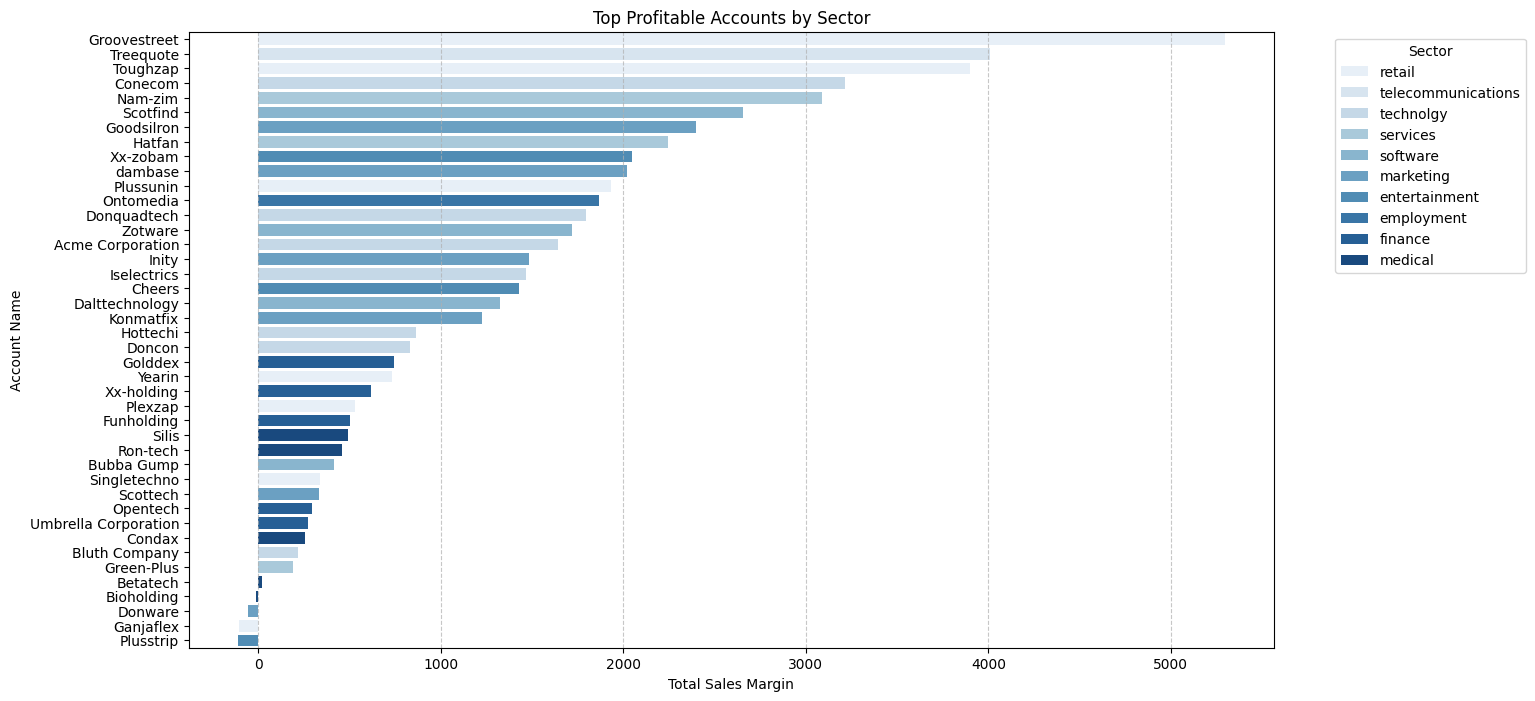

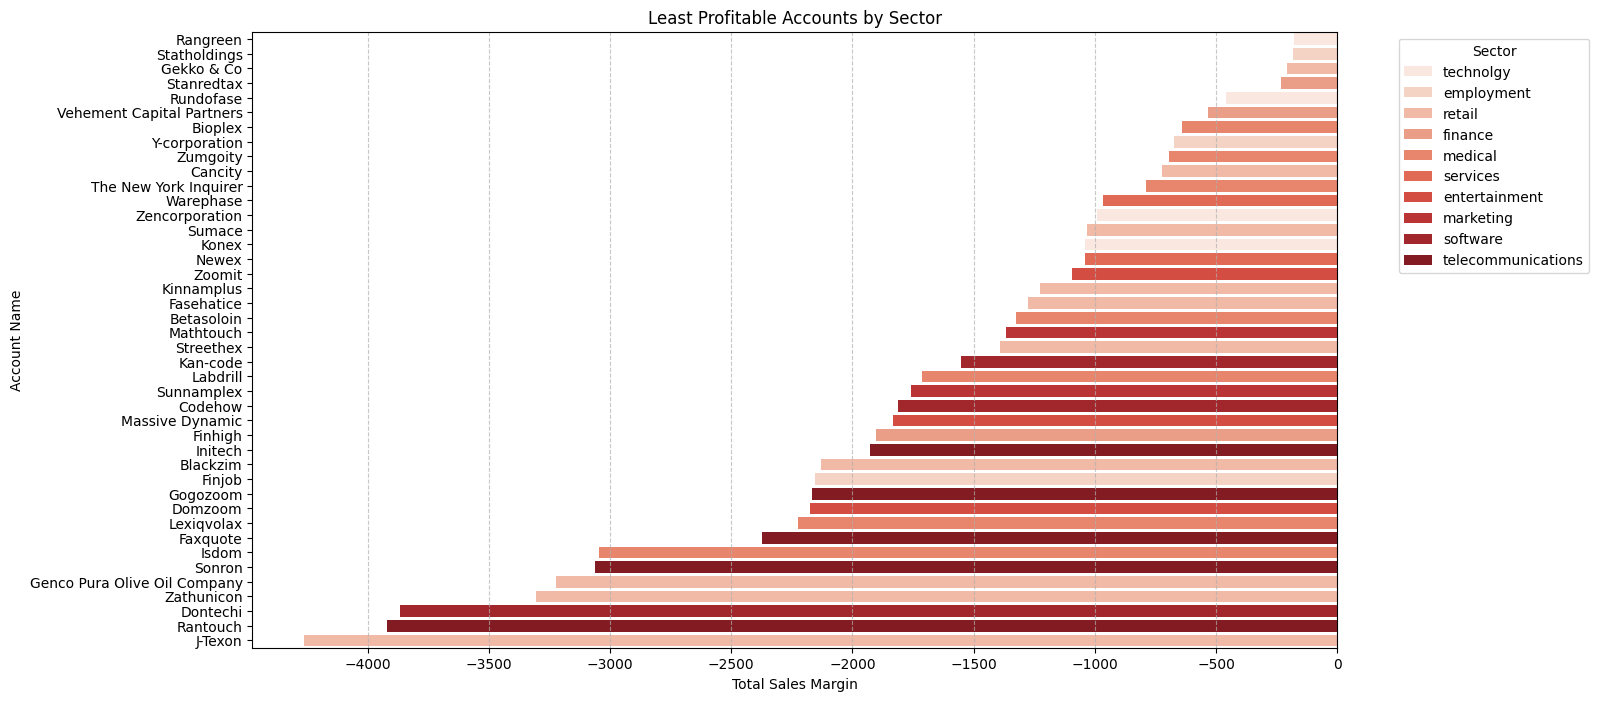

/var/folders/vh/yn_93j315gn6jdvz7f2d73_m0000gn/T/ipykernel_44672/3796990430.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales_margin', y='sector', data=sector_profitability.sort_values(by='total_sales_margin', ascending=False), palette='coolwarm')


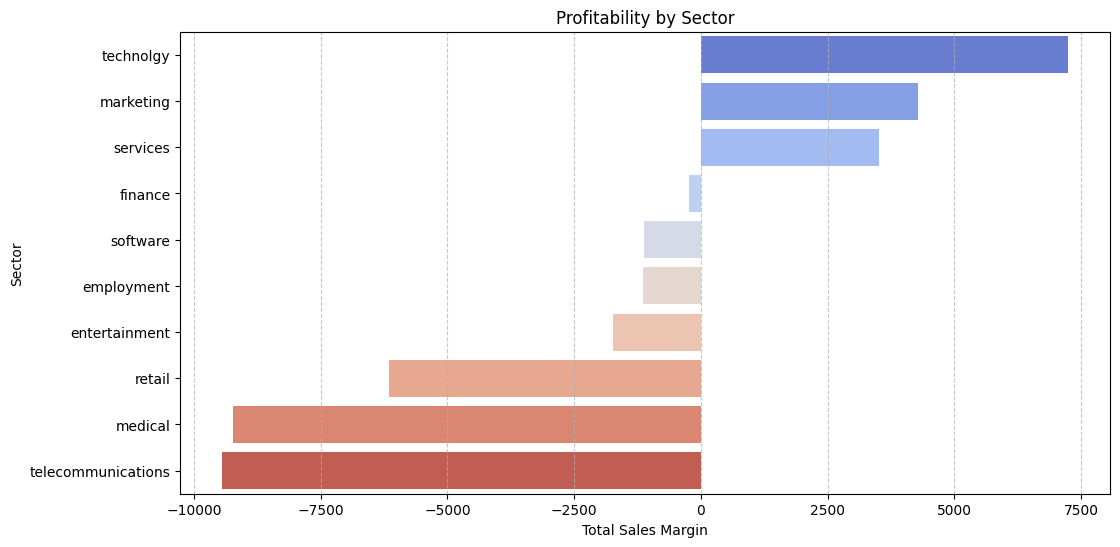

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by account_name and sector to calculate total sales volume, total revenue, and total sales margin
account_sector_profitability = won_deals.groupby(['account_name', 'sector']).agg(
    total_sales_volume=('close_value', 'sum'),
    total_revenue=('revenue', 'sum'),
    total_sales_margin=('sales_margin', 'sum')
).reset_index()

# Group by sector only to calculate total sales volume, total revenue, and total sales margin
sector_profitability = won_deals.groupby('sector').agg(
    total_sales_volume=('close_value', 'sum'),
    total_revenue=('revenue', 'sum'),
    total_sales_margin=('sales_margin', 'sum')
).reset_index()

account_sector_profitability_sorted = account_sector_profitability.sort_values(by='total_sales_margin', ascending=False)

# Split the data into top and bottom halves
top_accounts = account_sector_profitability_sorted.head(len(account_sector_profitability_sorted) // 2)
bottom_accounts = account_sector_profitability_sorted.tail(len(account_sector_profitability_sorted) // 2)

# Plot for Top Profitable Accounts by Sector
plt.figure(figsize=(14, 8))
sns.barplot(x='total_sales_margin', y='account_name', hue='sector', data=top_accounts, palette='Blues')
plt.title("Top Profitable Accounts by Sector")
plt.xlabel("Total Sales Margin")
plt.ylabel("Account Name")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot for Least Profitable Accounts by Sector
plt.figure(figsize=(14, 8))
sns.barplot(x='total_sales_margin', y='account_name', hue='sector', data=bottom_accounts, palette='Reds')
plt.title("Least Profitable Accounts by Sector")
plt.xlabel("Total Sales Margin")
plt.ylabel("Account Name")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
# Plotting profitability by sector only
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales_margin', y='sector', data=sector_profitability.sort_values(by='total_sales_margin', ascending=False), palette='coolwarm')
plt.title("Profitability by Sector")
plt.xlabel("Total Sales Margin")
plt.ylabel("Sector")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()